<a href="https://colab.research.google.com/github/lucasantuneso/PUC-MVP/blob/main/MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise de Dados e Boas Práticas

## Aluno. Lucas Antunes de Oliveira

### MVP Heart Attack Analysis & Prediction Dataset(Conjunto de dados de análise e previsão de ataque cardíaco)

##1. Dataset: Análise e Previsão de Ataque Cardíaco

<li>O dataset utilizado neste projeto é proveniente do Kaggle e está disponível no seguinte link: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset .
</li>

- Descrição do Problema:
O conjunto de dados refere-se a informações médicas e fatores de risco relacionados a ataques cardíacos. Um ataque cardíaco, também conhecido como infarto do miocárdio, acontece quando o fluxo sanguíneo para o coração é bloqueado, resultando em danos ao músculo cardíaco. Este problema visa analisar dados clínicos e demográficos para prever a probabilidade de um paciente sofrer um ataque cardíaco com base em certas características e sintomas.
Os atributos fornecidos incluem informações como idade, sexo, pressão arterial em repouso, níveis de colesterol, sintomas de dor no peito, entre outros, que podem estar correlacionados com a probabilidade de um ataque cardíaco. O objetivo é entender a relação entre esses atributos e a variável de destino "target" para prever se um paciente está mais ou menos propenso a ter um ataque cardíaco.
Esse problema é de extrema importância no campo da saúde, pois a previsão precoce de ataques cardíacos pode ajudar os profissionais médicos a tomar medidas preventivas e fornecer tratamento adequado a pacientes de alto risco.

- **Aprendizado Supervisionado ou Não Supervisionado:** Este é um problema de aprendizado supervisionado, pois envolve a previsão da variável de destino "target" (indicando a chance de ataque cardíaco) com base em atributos preexistentes. A tarefa é prever a chance de ataque cardíaco, usando os atributos fornecidos no conjunto de dados.

- **Premissas ou Hipóteses Sobre o Problema:** Algumas suposições ou hipóteses iniciais podem incluir a expectativa de que certos atributos, como idade, pressão arterial, colesterol e histórico familiar, terão correlação com a chance de ataque cardíaco. Além disso, presume-se que certos sintomas ou fatores de risco, como dor no peito, pressão arterial elevada ou altos níveis de colesterol, possam ser indicativos de maior chance de ataque cardíaco.

- **Restrições ou Condições nos Dados:** As restrições ou condições nos dados podem incluir a integridade dos dados, ausência de valores nulos ou inconsistências, e a necessidade de manipulação de dados categóricos para aplicar algoritmos de aprendizado de máquina.

- **Descrição Detalhada dos Atributos:**
    - **Age (Idade):** Idade do paciente.
    - **Sex (Sexo):** Sexo do paciente (0 = feminino, 1 = masculino).
    - **cp (Tipo de Dor no Peito):**
        - 1: Angina típica
        - 2: Angina atípica
        - 3: Dor não anginosa
        - 4: Assintomático
    - **trtbps (Pressão Arterial em Repouso):** Pressão arterial em repouso (mm Hg).
    - **chol (Colesterol):** Colesterol em mg/dL obtido através do sensor de IMC.
    - **fbs (Nível de Glicemia em Jejum):** Nível de glicemia em jejum (> 120 mg/dL).
    - **rest_ecg (Resultados Eletrocardiográficos em Repouso):**
        - 0: Normal
        - 1: Anormalidade da onda ST-T
        - 2: Mostrando hipertrofia ventricular esquerda
    - **thalach (Frequência Cardíaca Máxima Alcançada):** Frequência cardíaca máxima alcançada.
    - **target (Variável de Destino):** 0 = Menor chance de ataque cardíaco, 1 = Maior chance de ataque cardíaco.



In [ ]:
#Import todas as bibliotecas

import numpy as np  # Para operações numéricas avançadas e manipulação de arrays (álgebra linear)
import pandas as pd  # Para manipulação e análise de dados em formato de DataFrame
import scipy as sp  # Biblioteca para matemática, estatística e funções científicas
import re  # Para operações de expressões regulares
import time  # Para manipulação e medição de tempo
import matplotlib.pyplot as plt  # Para criação de gráficos e visualizações básicas
import seaborn as sns  # Baseado no Matplotlib, usado para visualizações estatísticas mais avançadas
import os  # Para interação com o sistema operacional, como manipulação de arquivos
import plotly.express as px  # Biblioteca para visualizações interativas e expressivas
import matplotlib as mpl  # Configurações e personalizações adicionais para gráficos Matplotlib
import missingno as ms  # Para visualização de dados ausentes (missing data)
from sklearn.model_selection import train_test_split   # Para dividir os dados em conjuntos de treino e teste
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder # Para pré-processamento de dados
from sklearn.linear_model import LogisticRegression # Para usar o algoritmo de Regressão Logística
from sklearn.metrics import accuracy_score, confusion_matrix # Para avaliação da performance do modelo


In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# 2. Carga de Dados

Iremos usar o pacote Pandas (Python Data Analysis Library) para carregar de um arquivo .csv sem cabeçalho disponível online.

Com o dataset carregado, iremos explorá-lo um pouco.


In [ ]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/lucasantuneso/PUC-MVP/main/heart.csv"

# Informa o cabeçalho das colunas
colunas =['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']

# Lê o arquivo utilizando as colunas informadas
df = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')


In [ ]:
#Irá exibir as primeiras linhas de um DataFrame
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

# 3. Análise de Dados
<li>Esta seção explora o conjunto de dados com estatísticas descritivas, incluindo detalhes sobre tamanho e tipos de colunas. Apresenta visualizações unimodais para entender a distribuição de variáveis-chave, como idade, frequência cardíaca máxima e pressão arterial em repouso. Análises multimodais revelam relações entre variáveis, enquanto análises exploratórias adicionais investigam correlações e diferenciações por sexo. As etapas futuras abordarão uma análise mais aprofundada das relações e interpretações entre os atributos do conjunto de dados.</li>

###3.1 Estatísticas Descritivas e Informações Gerais do Dataset:

<li>Nesta seção, serão apresentadas informações sobre o tamanho do conjunto de dados, detalhes sobre suas colunas e tipos de dados, bem como estatísticas descritivas como média, desvio padrão e quartis. Além disso, será explorada a contagem de valores por idade, oferecendo uma visão inicial da distribuição dos dados. </li>


In [ ]:
# Dimensões do dataset
df.shape

(303, 14)

In [ ]:
# Informações do dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [ ]:
# Visualizar as últimas 10 linhas
df.tail(10)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
293   67    1   2     152   212    0        0       150     0      0.8    1   
294   44    1   0     120   169    0        1       144     1      2.8    0   
295   63    1   0     140   187    0        0       144     1      4.0    2   
296   63    0   0     124   197    0        1       136     1      0.0    1   
297   59    1   0     164   176    1        0        90     0      1.0    1   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
293    0      3       0  
294    0      1       0  
295    2      3       0  
296    0      2       0  
297    2      1       0  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0

In [ ]:
# Tipos de dados das colunas
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [ ]:
# Estatísticas descritivas
df.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [ ]:
# Contagem de valores por idade
print(df.groupby('age').size())

age
29     1
34     2
35     4
37     2
38     3
39     4
40     3
41    10
42     8
43     8
44    11
45     8
46     7
47     5
48     7
49     5
50     7
51    12
52    13
53     8
54    16
55     8
56    11
57    17
58    19
59    14
60    11
61     8
62    11
63     9
64    10
65     8
66     7
67     9
68     4
69     3
70     4
71     3
74     1
76     1
77     1
dtype: int64


###3.2 Visualizações Unimodais:

<li>Esta categoria aborda visualizações unimodais, começando com um histograma específico para a idade, exibindo a distribuição e contagem das idades presentes no dataset. Além disso, serão exploradas visualizações semelhantes para outras variáveis unimodais, como frequência cardíaca máxima (thalachh), pressão arterial em repouso (trtbps), níveis de colesterol (chol), entre outras. </li>


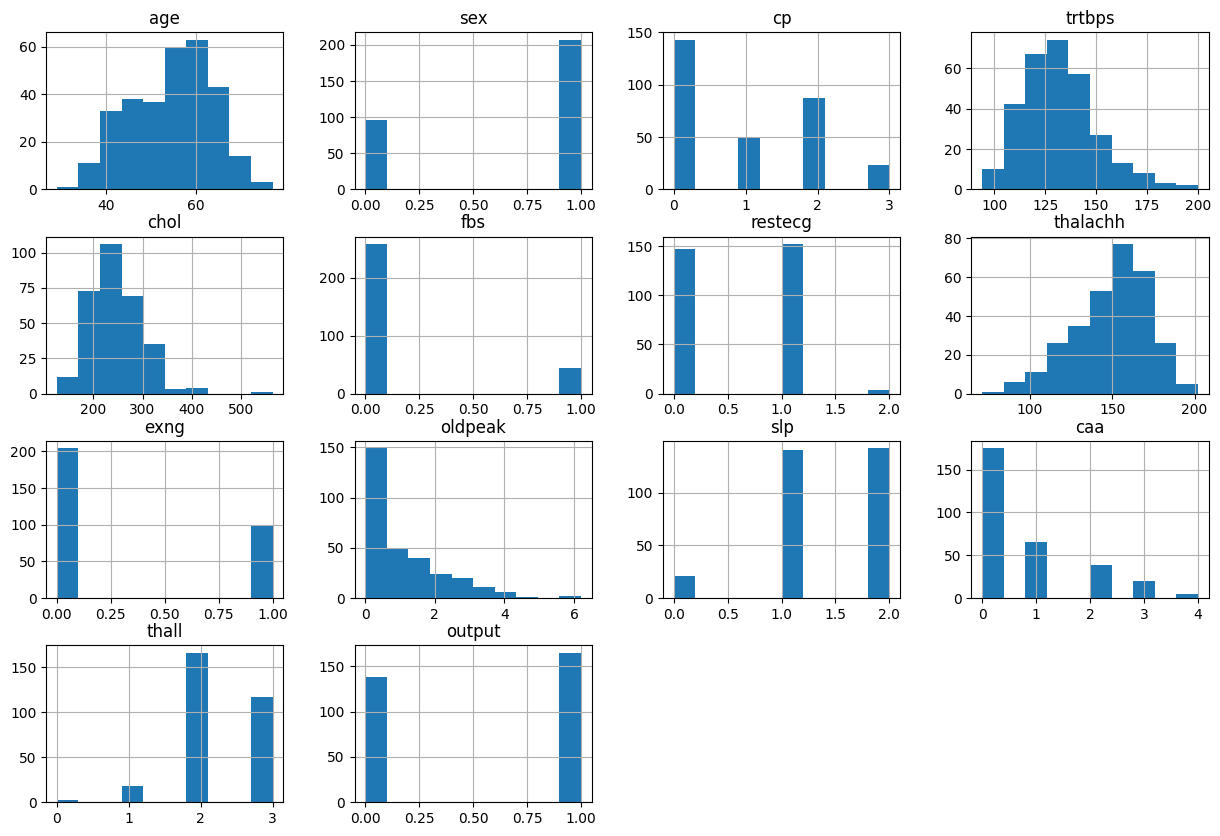

In [ ]:
# Histograma
df.hist(figsize = (15,10))
plt.show()

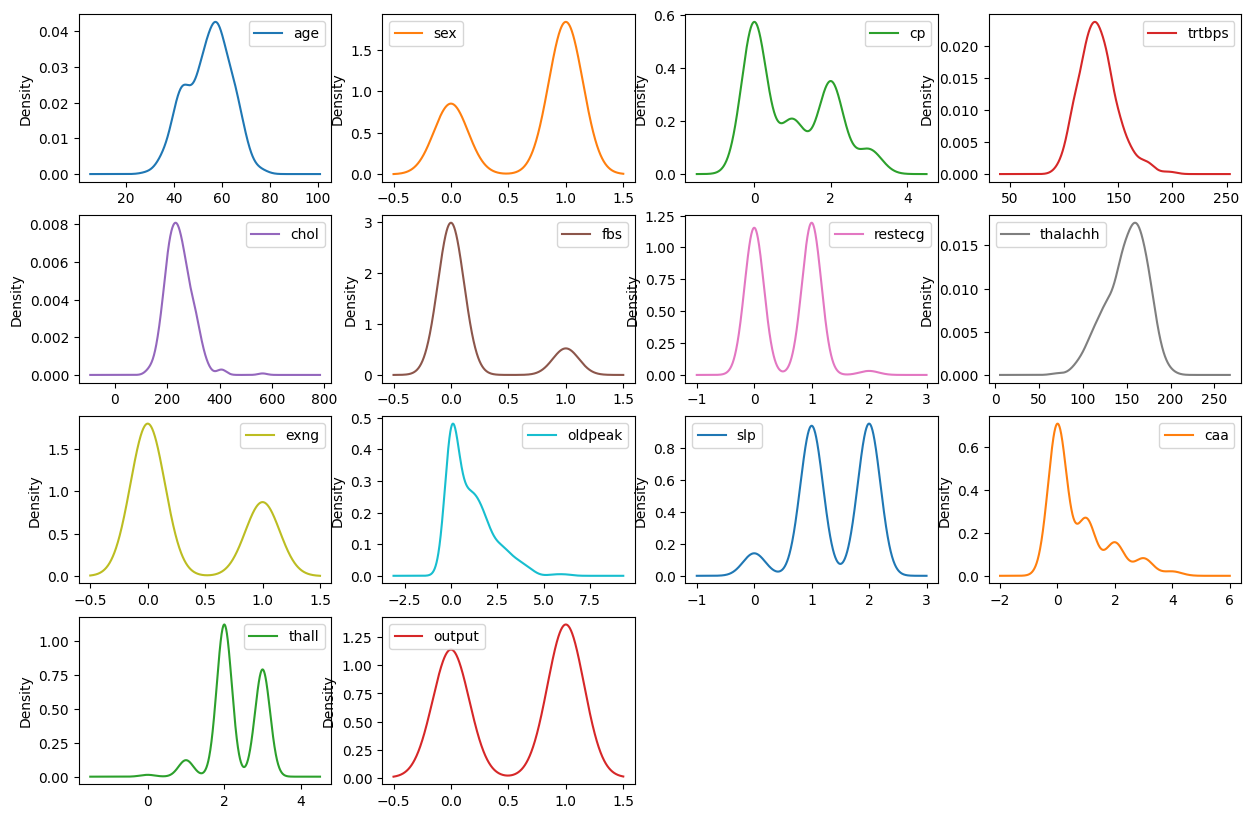

In [ ]:
# Density Plot
df.plot(kind = 'density', subplots = True, layout = (4,4), sharex = False, figsize = (15,10))
plt.show()

A partir da análise do histograma e do Density Plot, foi possível observar que:

1. **Idade**:
   - O histograma da idade mostra que a faixa etária mais comum está entre 40 e 60 anos. Isso sugere que há um número significativo de pacientes nessa faixa etária.

2. **Sexo**:
   - No gráfico de sexo, o valor 1 parece ser mais frequente do que o valor 0. Isso pode indicar que há mais dados de pacientes do sexo masculino do que do sexo feminino.

3. **Tipo de Dor no Peito (CP)**:
   - O tipo de dor no peito 0 é o mais comum, com quase 150 ocorrências. Isso pode indicar que um tipo específico de dor no peito é mais prevalente entre os pacientes.

4. **Pressão Arterial em Repouso (TRTBPS)**:
   - A pressão arterial em repouso está concentrada entre 110 e 145. Essa faixa representa os valores mais comuns para a pressão sanguínea em repouso nos pacientes.

5. **Colesterol (CHOL)**:
   - Os valores de colesterol são altos, especialmente entre 200 e 300. Isso pode indicar uma alta concentração de pacientes com níveis elevados de colesterol, um fator de risco para problemas cardíacos.

6. **Açúcar no Sangue em Jejum (FBS)**:
   - O valor 0 é muito mais frequente do que o valor 1, indicando que a maioria dos pacientes tem níveis de glicose em jejum abaixo de um determinado limite.

7. **Resultados do Eletrocardiograma em Repouso (RESTECG)**:
   - O valor 0 está ligeiramente mais elevado do que o valor 1 nos resultados do eletrocardiograma em repouso. Isso pode indicar uma predominância de um tipo específico de resultado de ECG em pacientes.

8. **Frequência Cardíaca Máxima Alcançada (THALACHH)**:
   - A frequência cardíaca máxima alcançada aumenta consideravelmente a partir dos 40 anos. Isso sugere uma relação entre a idade e a capacidade máxima do coração de responder ao esforço.

9. **Angina Induzida pelo Exercício (EXNG)**:
   - O valor 0 é muito mais frequente do que o valor 1, indicando que a maioria dos pacientes não experimenta angina induzida pelo exercício.

10. **Depressão do Segmento ST Induzida por Exercício em Relação ao Repouso (OLDPEAK)**:
    - O valor 0 é consideravelmente mais alto. Isso pode indicar uma relação entre essa medida específica (depressão do segmento ST) e a condição cardíaca dos pacientes.

11. **Inclinação do Segmento ST no Pico do Exercício (SLP)**:
    - Os valores 1 e 2 têm frequências mais elevadas, indicando diferentes padrões na inclinação do segmento ST durante o pico do exercício.

12. **Número de Vasos Sanguíneos Principais (CAA)**:
    - O valor 0 apresenta uma frequência muito maior, sugerindo que a maioria dos pacientes não possui vasos sanguíneos principais coloridos por fluoroscopia.

13. **Talassemia (THALL)**:
    - Os valores 2 e 3 têm frequências muito altas, indicando uma predominância desses tipos específicos de talassemia no conjunto de dados.

14. **Presença de Doença Cardíaca (Output)**:
    - O gráfico para a presença de doenças cardíacas (1) é consideravelmente mais alto do que para a ausência (0), sugerindo uma predominância de casos de doenças cardíacas no conjunto de dados.

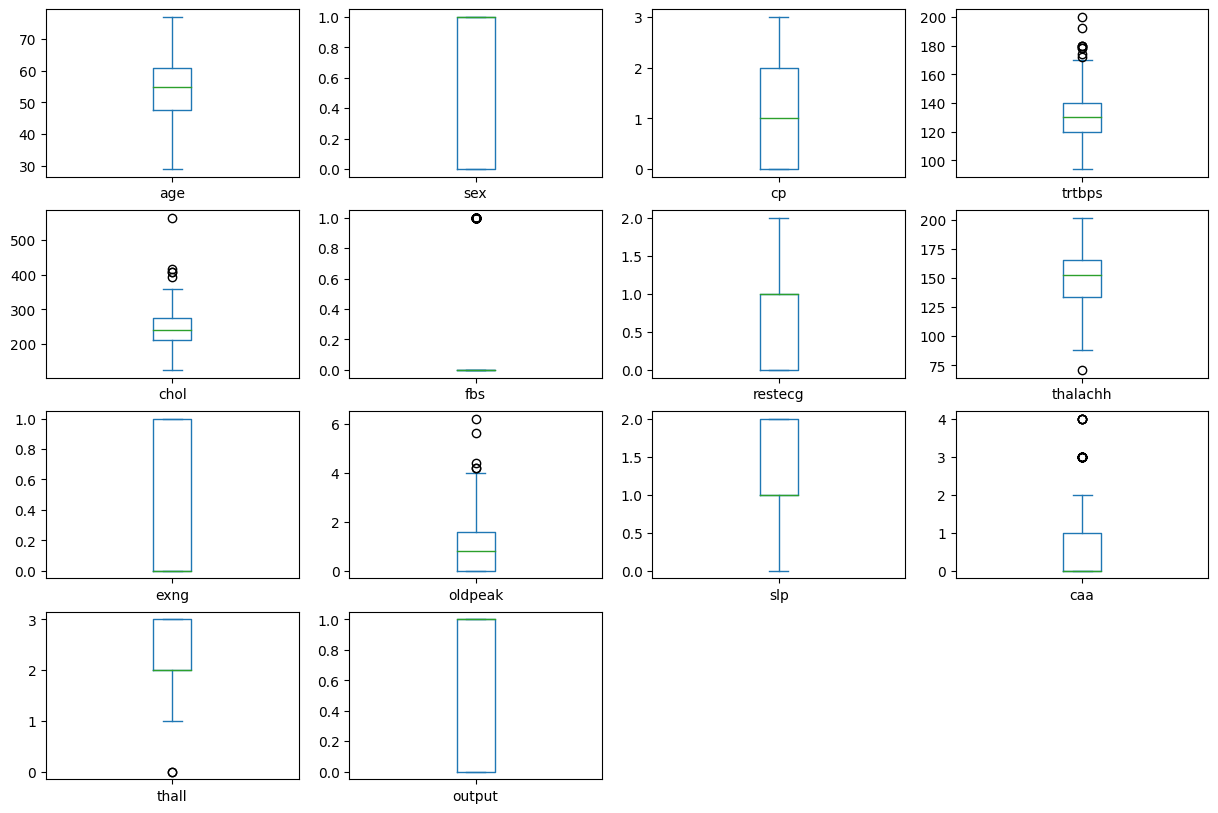

In [ ]:
# Boxplot
df.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, figsize = (15,10))
plt.show()

A partir da análise do boxplot, foi possível observar que:


1. **Idade**
   - Utilizando o boxplot, observa-se que a distribuição da idade está concentrada entre 45 e 62 anos, com a mediana em torno de 55 anos. A linha verde no gráfico indica a mediana, representando o ponto médio da distribuição.

2. **Sexo**
   - O boxplot evidencia uma representação elevada do sexo codificado como "1", indicando uma maior incidência ou representação desse gênero no conjunto de dados.

3. **CP (Tipo de Dor no Peito)**
   - Observa-se, através do boxplot, uma predominância do tipo de dor no peito codificado como "01", indicando que este tipo é mais comum ou mais frequentemente registrado no conjunto de dados.

4. **TRTBPS (Pressão Arterial em Repouso)**
   - A distribuição da pressão arterial em repouso está centrada em torno de 130, com várias observações consideravelmente mais altas, representadas por bolhas que vão de 170 a valores possivelmente próximos a 200. Essas bolhas são consideradas valores atípicos ou outliers.

5. **Chol (Colesterol)**
   - Nota-se que a mediana do colesterol está próxima de 230. Além disso, existem valores consideravelmente mais altos, representados por bolhas acima do gráfico, variando de 400 até mais de 500, sugerindo a presença de outliers.

6. **FBS (Açúcar no Sangue em Jejum)**
   - O boxplot mostra uma linha verde no número zero e uma bolha na posição um. Isso indica que a maioria dos valores está abaixo do limiar de açúcar no sangue em jejum estabelecido.

7. **RESTECG (Resultado do Eletrocardiograma de Repouso)**
   - A linha verde está localizada no número 1, indicando a representação de uma categoria específica desse resultado do eletrocardiograma de repouso.

8. **Thalachh (Frequência Cardíaca Máxima Alcançada)**
   - O boxplot mostra um outlier abaixo de 75 e a linha verde está um pouco acima de 150, indicando a variabilidade na distribuição da frequência cardíaca máxima alcançada.

9. **Exng (Angina Induzida por Exercício)**
   - A linha verde está no número 0, possivelmente indicando a ausência de angina induzida por exercício para a maioria das observações.

10. **Oldpeak (Depressão do Segmento ST Induzida por Exercício Relativo ao Repouso)**
    - Observa-se que a mediana está entre 0 e um pouco abaixo de 2, representada pela linha verde, com valores atípicos acima, mostrados por bolhas nos números 4 e abaixo de 6.

11. **SP (Inclinação do Segmento ST)**
    - A linha verde está no número 1, sugerindo uma representação específica da inclinação do segmento ST no conjunto de dados.

12. **Açúcar no Sangue em Jejum**
    - A linha verde está no zero e há duas bolhas notáveis nos números 3 e 4, indicando possíveis outliers ou valores incomuns.

13. **Thall (Resultado do Teste de Estresse Cardíaco)**
    - O boxplot revela uma bolha na parte inferior no número 0, enquanto a linha verde está no número 2, representando a distribuição do resultado do teste de estresse cardíaco.

14. **Output**
    - A linha verde está no número 1, indicando a representação da categoria específica de saída ou diagnóstico no conjunto de dados.

###3.3 Visualizações Multimodais:

<li>Nesta seção, focaremos em visualizações que exploram relações entre variáveis, como a relação entre a idade e a pressão arterial em repouso (trtbps) considerando a variável de resultado (output), indicando a probabilidade de ataque cardíaco. Serão examinadas outras relações multimodais entre a idade e diferentes variáveis, buscando insights sobre a associação delas com o risco cardiovascular. </li>


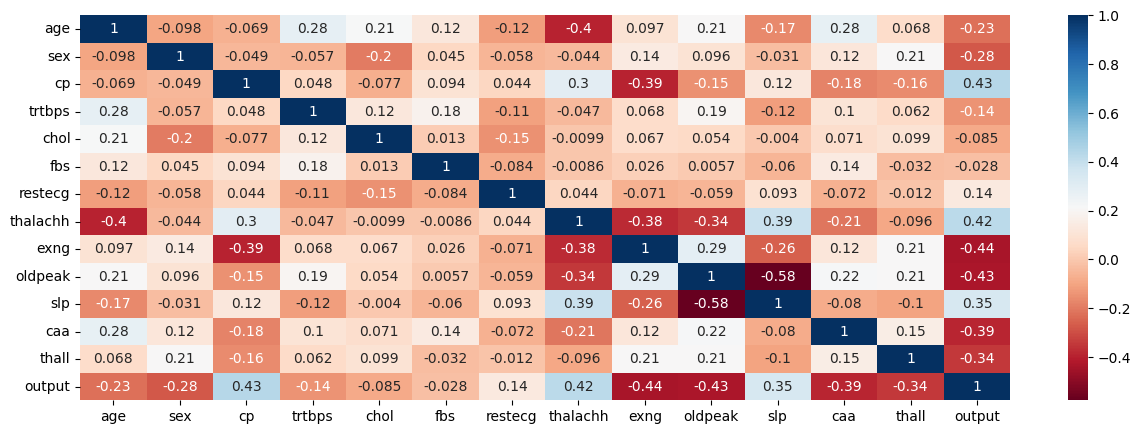

In [ ]:
# Matriz de Correlação com Matplotlib Seaborn
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df.corr(), annot=True, cmap='RdBu');

Por sua vez, o gráfico de dispersão (**scatter plot**) mostra o relacionamento entre duas variáveis. Vamos exibir um para cada par de atributos dos dataset, usando o Seaborn.

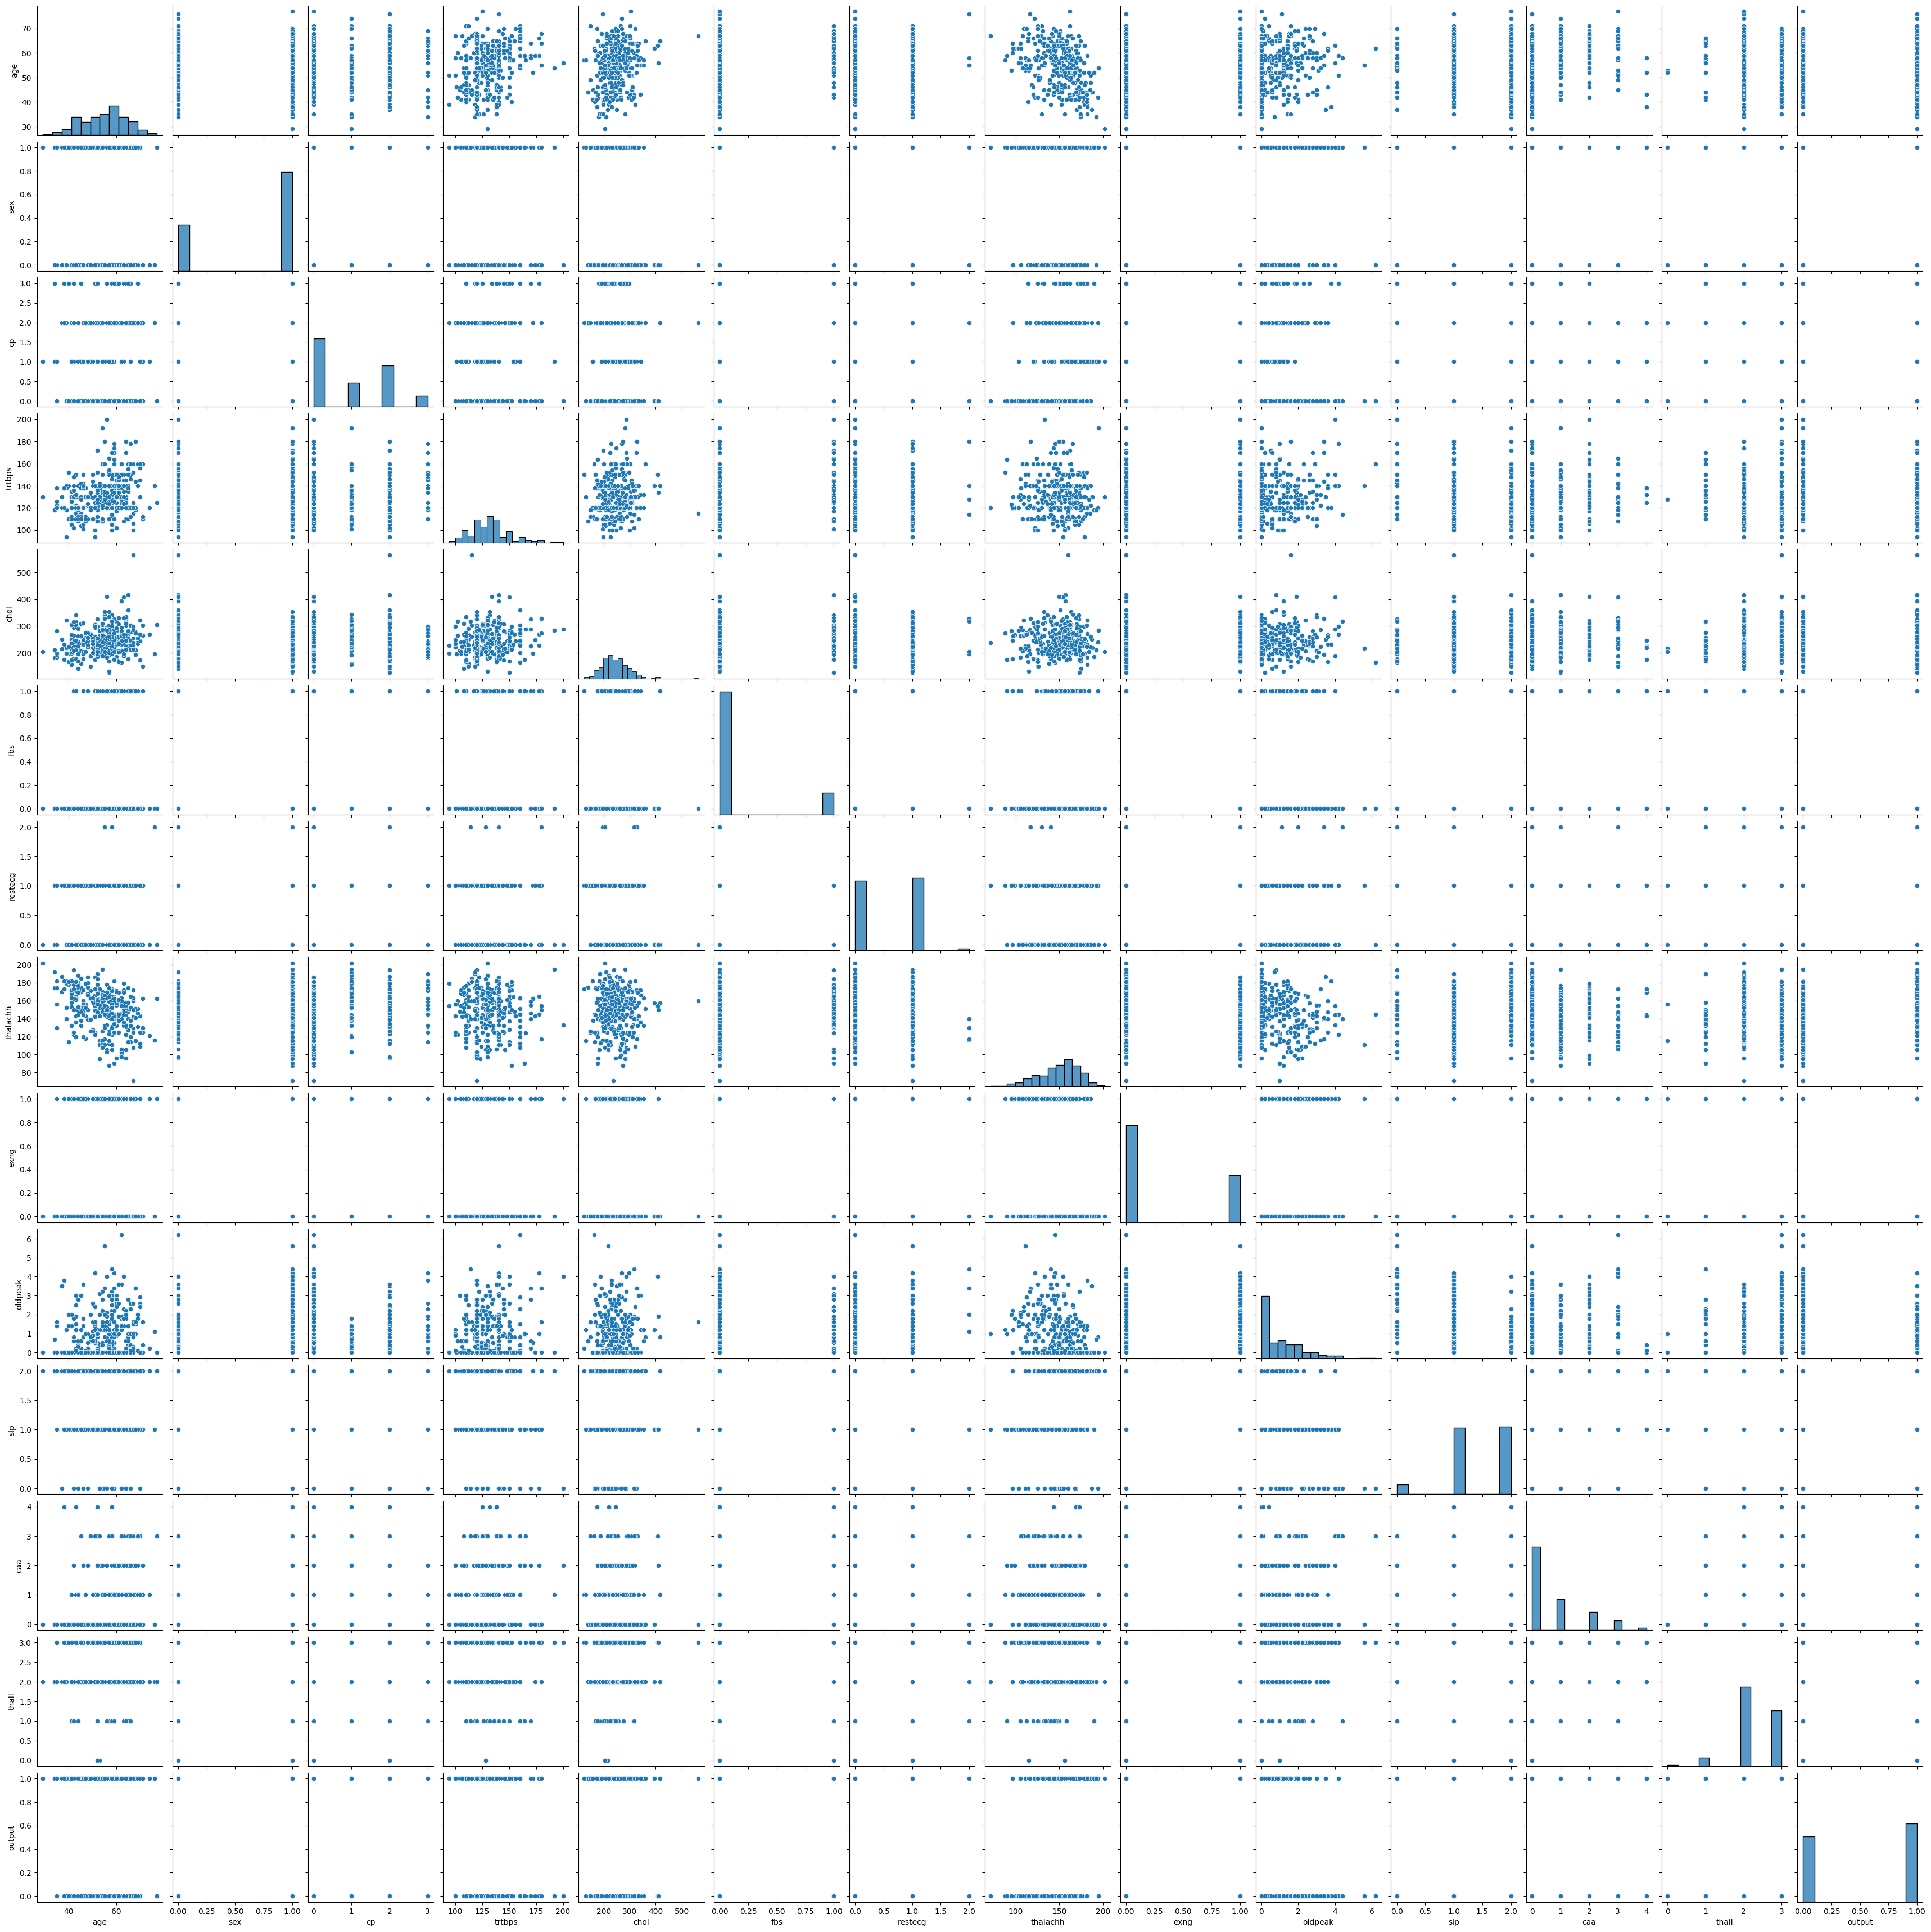

In [ ]:
# Scatter Plot com Seaborn - Variação 1

sns.pairplot(df)

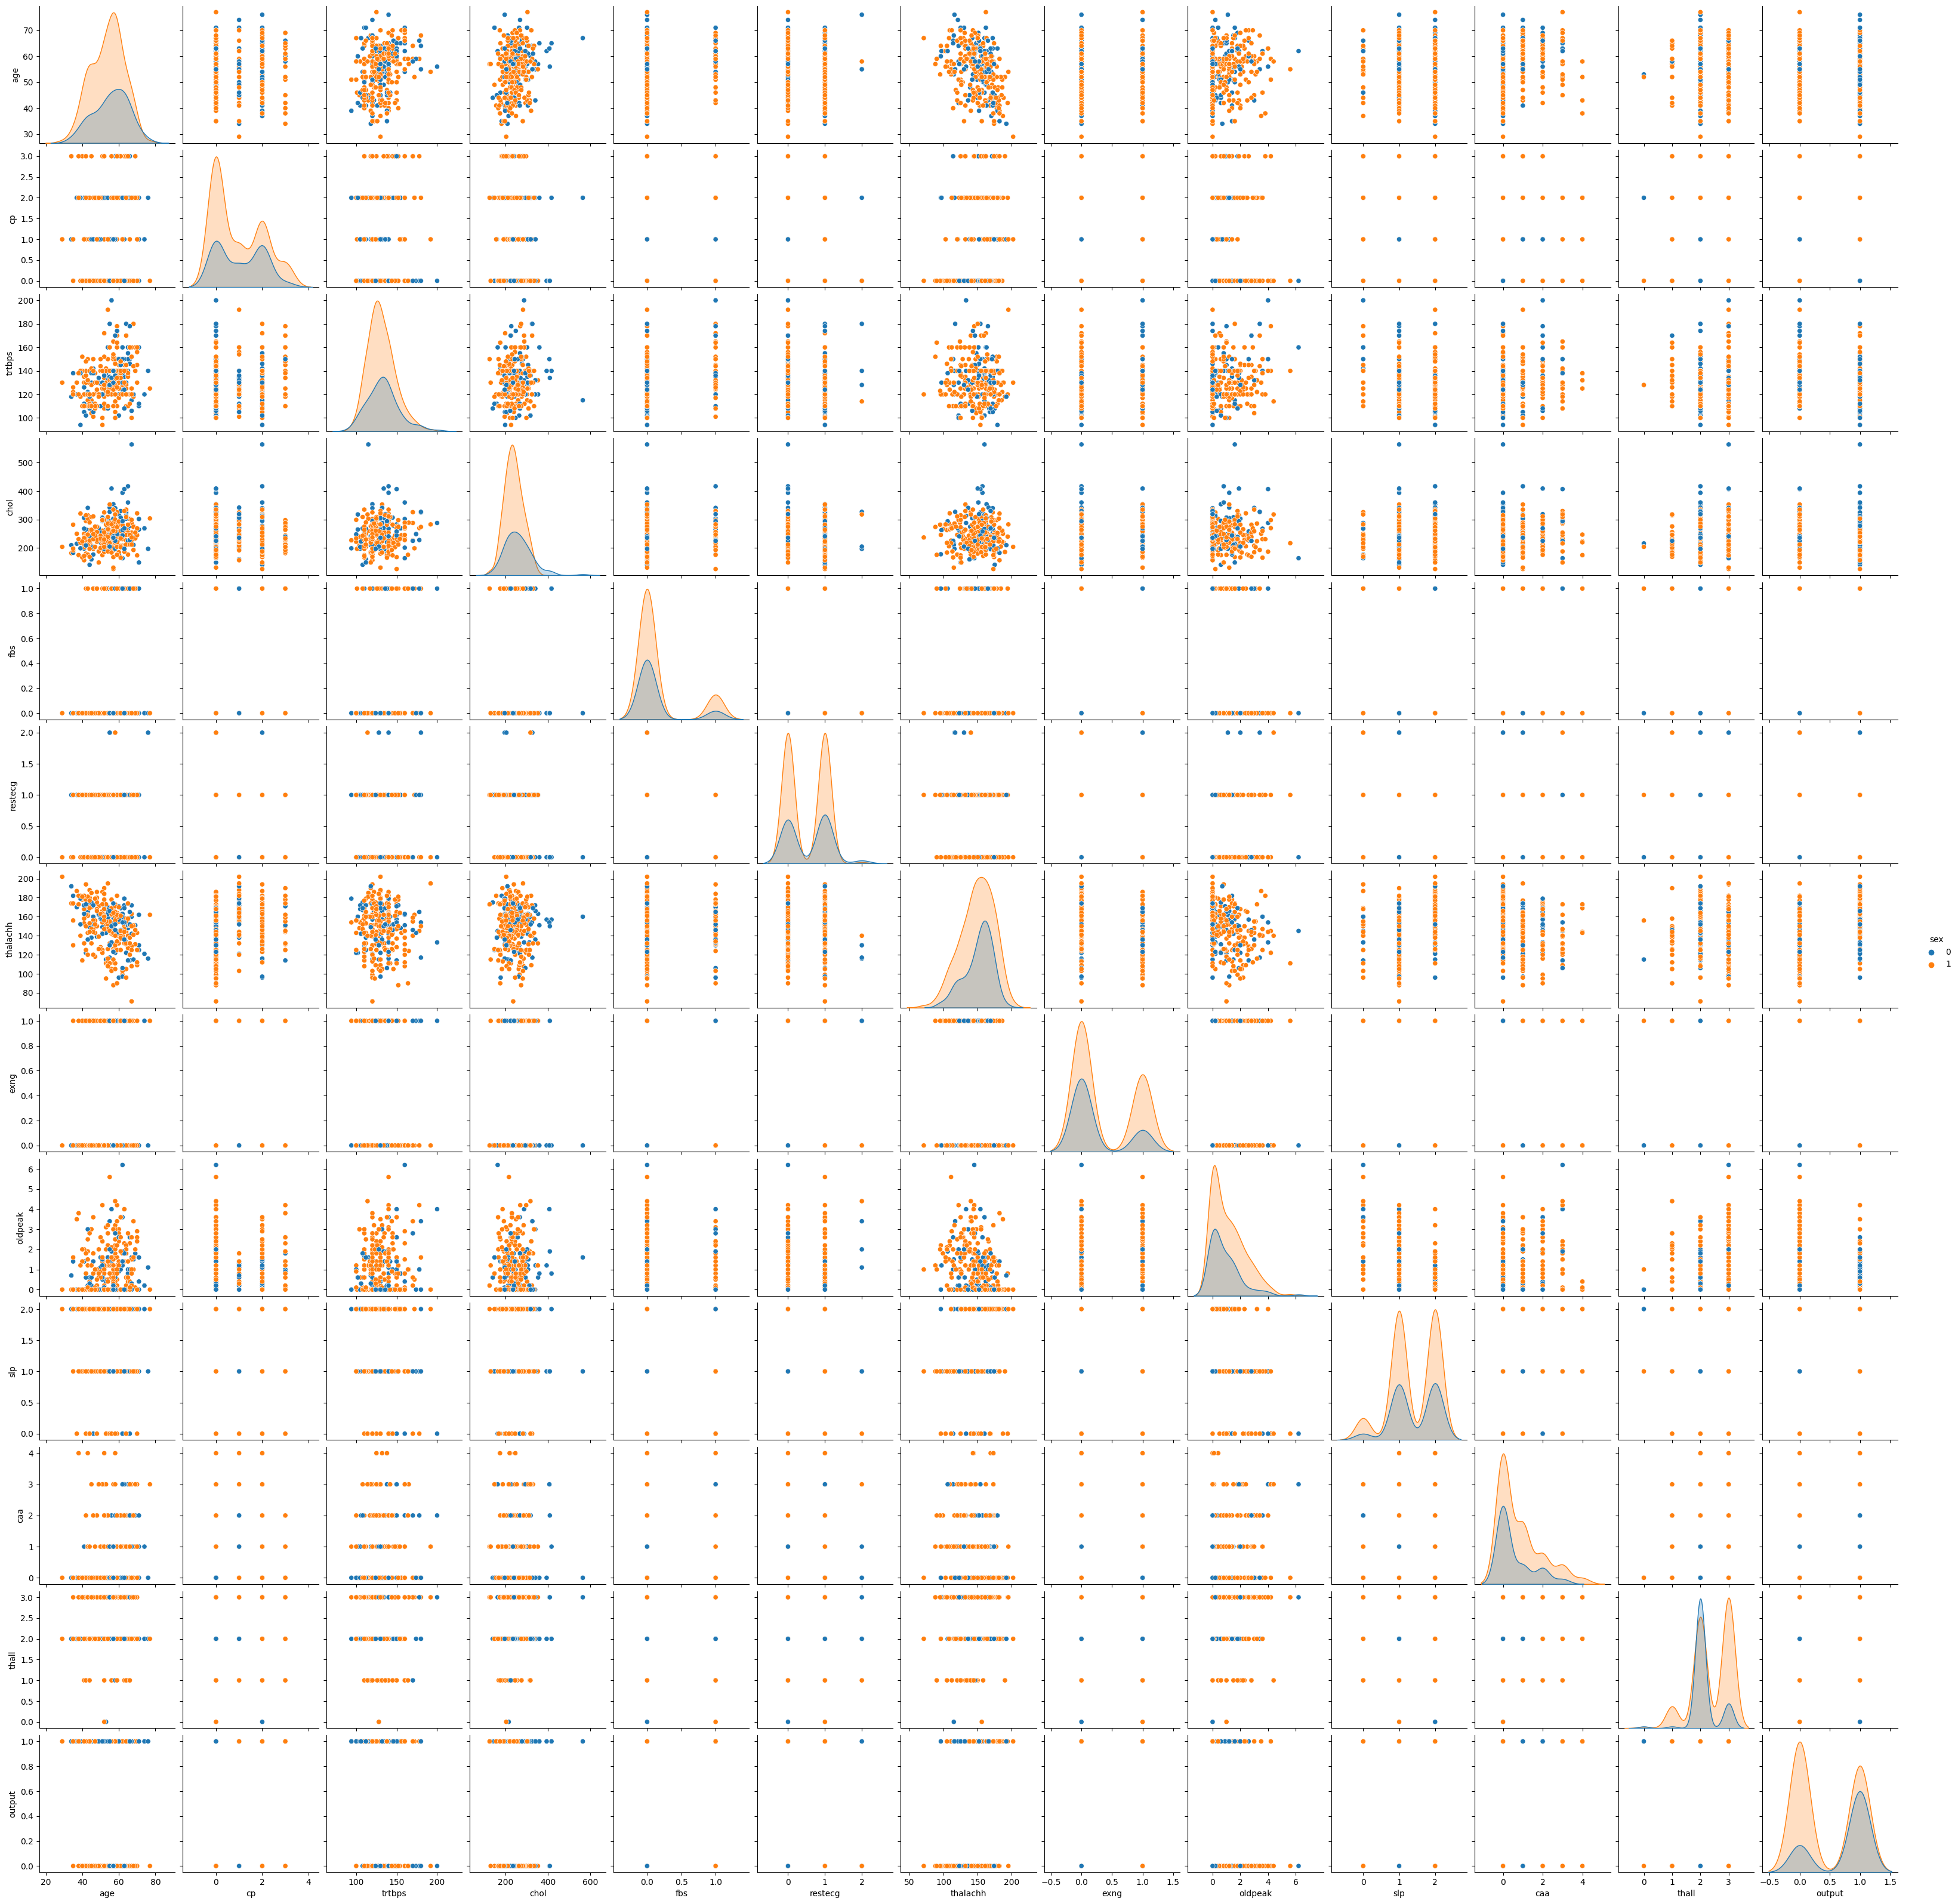

In [ ]:
# Scatter Plot com Seaborn - Variação 2
sns.pairplot(df, hue = "sex", height = 2.5);

A partir da análise do heatmap, Seaborn 1 e 2, foi possível observar que:


#### Variável Idade

* A variável com a maior correlação com a variável "idade" é a variável "thalach". Há uma correlação negativa entre elas, que podemos chamar de moderada.
* A gravidade da correlação é -0,40. Em outras palavras, há uma relação inversa entre as variáveis "idade" e "thalach".
* Se fizermos uma avaliação rápida neste contexto, podemos dizer que a quantidade de frequência cardíaca alcançada diminui conforme a idade aumenta, porque há uma proporção inversa entre elas.

#### Variável Trtbps

* A variável com a maior correlação com a variável "trtbps" é a variável "idade". A correlação entre elas é 0,28.
* Há uma correlação positiva de baixa intensidade.

#### Variável Chol

* A variável com a maior correlação com a variável "chol" é a variável "idade".
* Há uma correlação com magnitude de 0,21. Trata-se de uma correlação positiva baixa.
* Portanto, podemos dizer que conforme a idade aumenta, o colesterol também aumenta.

#### Variável Thalach

* A variável com a maior correlação com a variável "thalach" é a variável "target".
* Há uma correlação positiva de 0,42 e de intensidade moderada entre elas. Em outras palavras, é uma variável que pode desencadear diretamente um ataque cardíaco.
* Há uma variável com a qual esta variável tem muitas correlações.
* Significa que a frequência cardíaca máxima alcançada pode ser uma situação desencadeada por outras variáveis.

#### Variável Oldpeak

* Tem a maior proporção de correlação entre esta tabela de mudança. Essa correlação é -0,58 com a variável "slope".
* Há uma correlação negativa entre elas, ligeiramente acima da intensidade média.
* A correlação mais significativa após a variável "slope" é com a variável "target".

#### Variável Sexo

* Não há correlação robusta entre a variável "Sexo" e outras variáveis.
* O valor mais alto é -0,28 com a variável "target". Há uma correlação negativa de baixa intensidade entre elas.

#### Variável Cp

* A variável Cp captura alta correlação com as variáveis "thalach", "exang" e "target".
* A mais alta é novamente a variável "target". Há uma proporção direta entre elas.

#### Variável Fbs

* A variável "Fbs" geralmente não se correlaciona com outras variáveis.
* A maior correlação, com 0,18, pertence à variável "trtbps". Há uma correlação positiva baixa.
* Mas podemos dizer que quando o açúcar no sangue em jejum aumenta, a pressão arterial em repouso também aumenta.

#### Variável Rest_ecg

* Não há uma forte correlação entre a variável "Rest_ecg" e outras variáveis.
* A maior correlação foi 0,14 com a variável "target". Há uma correlação positiva de baixa intensidade.

#### Variável Exang

* A variável com a maior correlação com a variável de angina induzida por exercício é a variável "target" com -0,44.
* Além disso, parece estar associada a mais de uma variável, exceto "target".

#### Variável Slope

* A variável com a maior correlação com a variável "slope" é a variável "oldpeak". Há uma correlação acima da média entre essas duas. É o relacionamento mais significativo na tabela com 0,58.
* Tem uma correlação moderada com as variáveis "thalach" e "target".
* O relacionamento com outras variáveis é frágil.

#### Variável Ca

* A variável com a qual a variável "Ca" tem a maior correlação é a variável "target" com -0,39.
* Em seguida, vem a variável "idade" com 0,28. Podemos dizer que há uma correlação positiva baixa com a variável idade.

#### Variável Thal

* A variável com a qual a variável "Thal" tem a maior correlação é a variável "target" com -0,36.
* Não apresenta coeficientes de correlação muito altos com outras variáveis.

#### Variável Target

* A variável "target" se correlaciona com mais de uma variável.
* Em geral, podemos dizer que a relação está abaixo do nível médio.

###3.4 Análises Exploratórias Adicionais:

<li>Esta categoria apresenta análises exploratórias adicionais, incluindo histogramas gerais de todas as variáveis do dataset, gráficos de densidade, boxplots para visualização de distribuição por variável, matriz de correlação entre as variáveis, pairplot para explorar relacionamentos e diferenciações por sexo, além de uma matriz de correlação numérica. </li>

<li>Essas categorias visam organizar e facilitar a compreensão das diferentes análises e visualizações realizadas no dataset, abrangendo desde estatísticas descritivas até análises mais aprofundadas das relações entre variáveis. </li>


In [ ]:
# Matriz de correlação numérica
df.corr()

age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trtbps    0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalachh -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exng      0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slp      -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
caa       0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thall     0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
output   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg  thalachh      exng   oldpeak       slp       caa  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trtbps   -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalachh  0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exng     -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slp       0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
caa      -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thall    -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
output    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

             thall    output  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trtbps    0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalachh -0.096439  0.421741  
exng      0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slp      -0.104764  0.345877  
caa       0.151832 -0.391724  
thall     1.000000 -0.344029  
output   -0.344029  1.000000

 Distribuição das idades

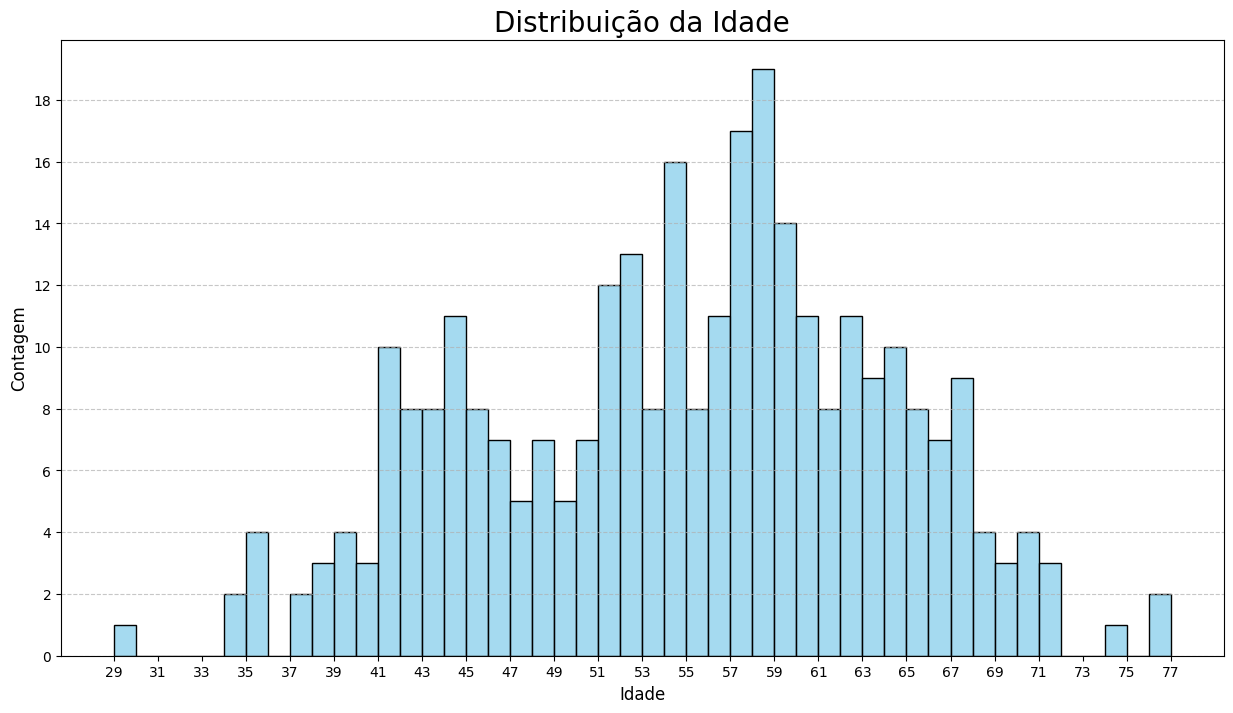

In [ ]:
#Plotando gráfico de Distribuição da Idade
plt.figure(figsize=(15, 8))
plt.title('Distribuição da Idade', size=20)
sns.histplot(df['age'], bins=48, color='skyblue', edgecolor='black')
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.xticks(list(range(29, 79, 2)))
plt.yticks(list(range(0, 20, 2)))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


 O gráfico de distribuição da idade mostra que há um pico entre as idades de 59 e 60 anos, onde a contagem de pessoas no dataset de ataque cardíaco (representado pela altura das barras).

Representação visual da distribuição dos gêneros

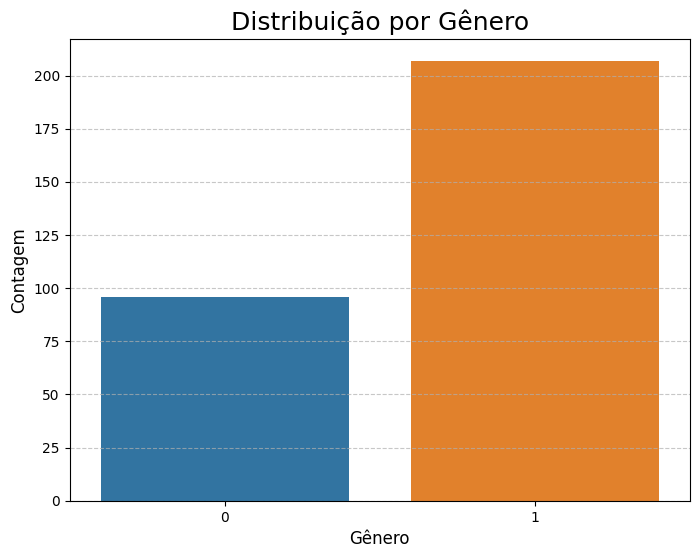

In [ ]:
# Contagem do Gênero
sex = df['sex'].value_counts()

#Plotando gráfico de distribuição por Gênero
plt.figure(figsize=(8, 6))
plt.title('Distribuição por Gênero', size=18)
sns.barplot(x=sex.index, y=sex.values)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.xticks([0, 1], ['0', '1'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Neste gráfico de barras, representa-se a distribuição por gênero no conjunto de dados. A categoria '1', destaca-se significativamente em relação à categoria '0', ultrapassando o valor de 200 na contagem. Isso sugere uma predominância ou maior representação desse gênero  dentro do conjunto de dados.

In [ ]:
# Obtendo a contagem dos sexos
sex_count = df['sex'].value_counts().reset_index()

#Plotando gráfico de pizza (pie chart) de Distribuição de Gênero
fig = px.pie(sex_count, names='index', values='sex', title='Distribuição de Gênero')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Os dados revelam uma predominância de 207 homens e 96 mulheres no conjunto de informações estudado. Essa diferenciação de gênero é evidenciada através da contagem exata de ocorrências de cada categoria, ilustrando a distribuição desses dados em termos de identificação de gênero.

Contagem dos diferentes tipos de dor no peito

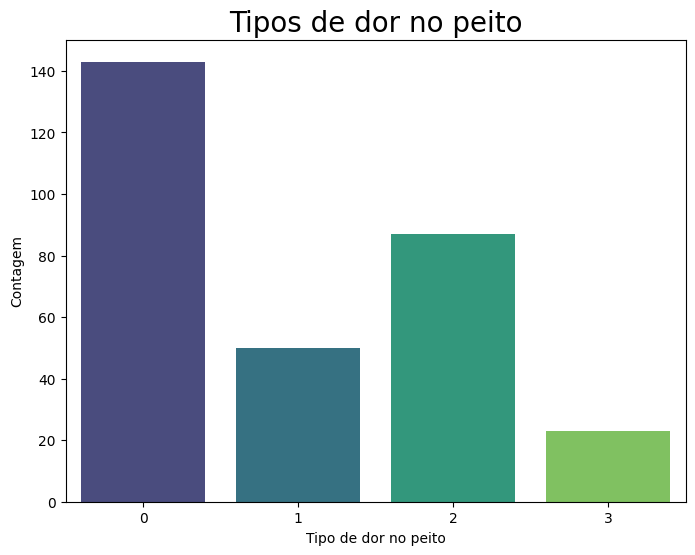

0    143
2     87
1     50
3     23
Name: cp, dtype: int64


In [ ]:
# Contagem dos tipos de dor no peito
cp = df['cp'].value_counts()


#Configuração do gráfico de dor no peito
plt.figure(figsize=(8, 6))
sns.barplot(x=cp.index, y=cp.values, palette='viridis')
plt.title('Tipos de dor no peito', size=20)
plt.xlabel('Tipo de dor no peito')
plt.ylabel('Contagem')
plt.show()

print(df.cp.value_counts())


De acordo com a categorização dos tipos de dor no peito nos dados analisados:
- **Tipo 0:** Refere-se à dor no peito conhecida como "angina típica", manifestando-se durante momentos de estresse físico ou emocional e diminuindo com o repouso. Neste conjunto de dados, 143 pessoas relataram sentir esse tipo de dor.
- **Tipo 1:** Indica a dor no peito classificada como "angina atípica", caracterizada por padrões menos claros em comparação ao tipo 0. Neste conjunto de dados, 50 pessoas sentiram esse tipo de dor.
- **Tipo 2:** Representa a dor no peito não associada à angina, frequentemente descrita como dor de origem muscular. Este tipo foi relatado por 87 pessoas.
- **Tipo 3:** Refere-se à dor no peito assintomática, ou seja, ausência de dor ou desconforto no peito. Neste conjunto de dados, 23 pessoas relataram esse tipo de experiência.

Portanto, com base nos dados, a maioria das pessoas indicou sentir o tipo de dor no peito categorizado como 0, seguido pelos tipos 2, 1 e 3, respectivamente. Essa distribuição destaca os diferentes tipos de experiências de dor no peito relatadas pelas pessoas representadas no conjunto de dados analisado.

 Pressão arterial em repouso (em mm Hg)

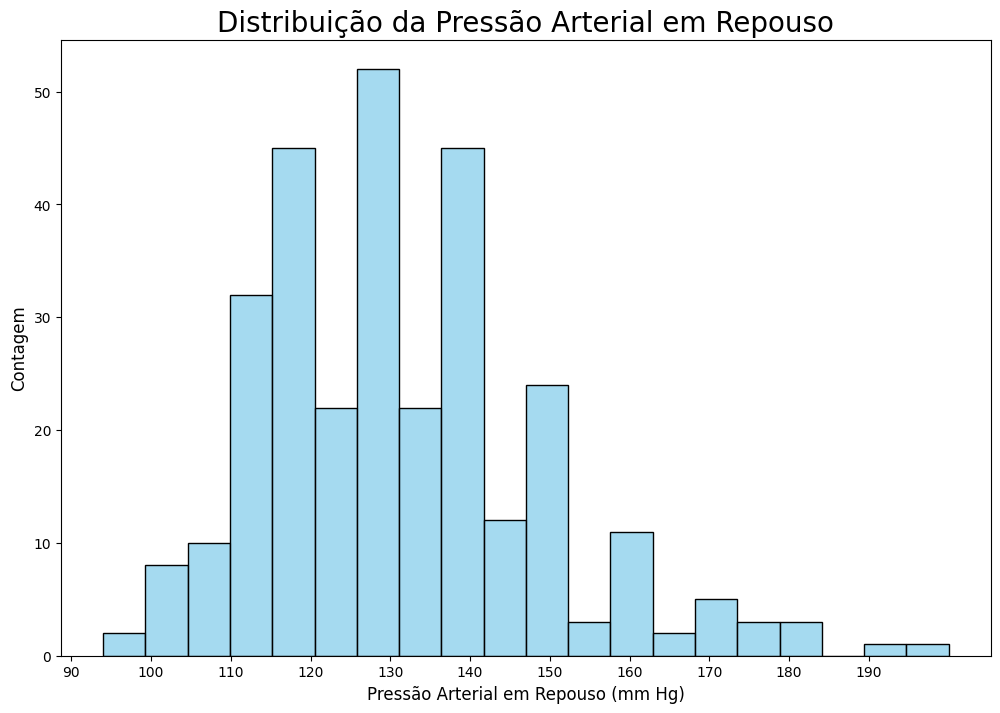

120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: trtbps, dtype: int64


In [ ]:
# Configurações do gráfico sobre Pressão Arterial em Repouso (em mm Hg)
plt.figure(figsize=(12, 8))
sns.histplot(df['trtbps'], kde=False, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição da Pressão Arterial em Repouso', size=20)
plt.xlabel('Pressão Arterial em Repouso (mm Hg)', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.xticks(list(range(90, 200, 10)))
plt.show()

# Exibindo a contagem dos valores de Pressão Arterial em Repouso
print(df.trtbps.value_counts())


Na representação da distribuição da pressão arterial em repouso, destaca-se uma barra de maior altura, centrada em torno de 130 mm Hg. Esta barra específica revela uma contagem superior a 50, sugerindo que a pressão arterial em torno de 130 mm Hg é a mais comum neste conjunto de dados. A visualização abrange um espectro de valores de pressão arterial em uma faixa crescente, variando de 95 a 200 mm Hg.



Colesterol em mg/dl obtido através do sensor de IMC

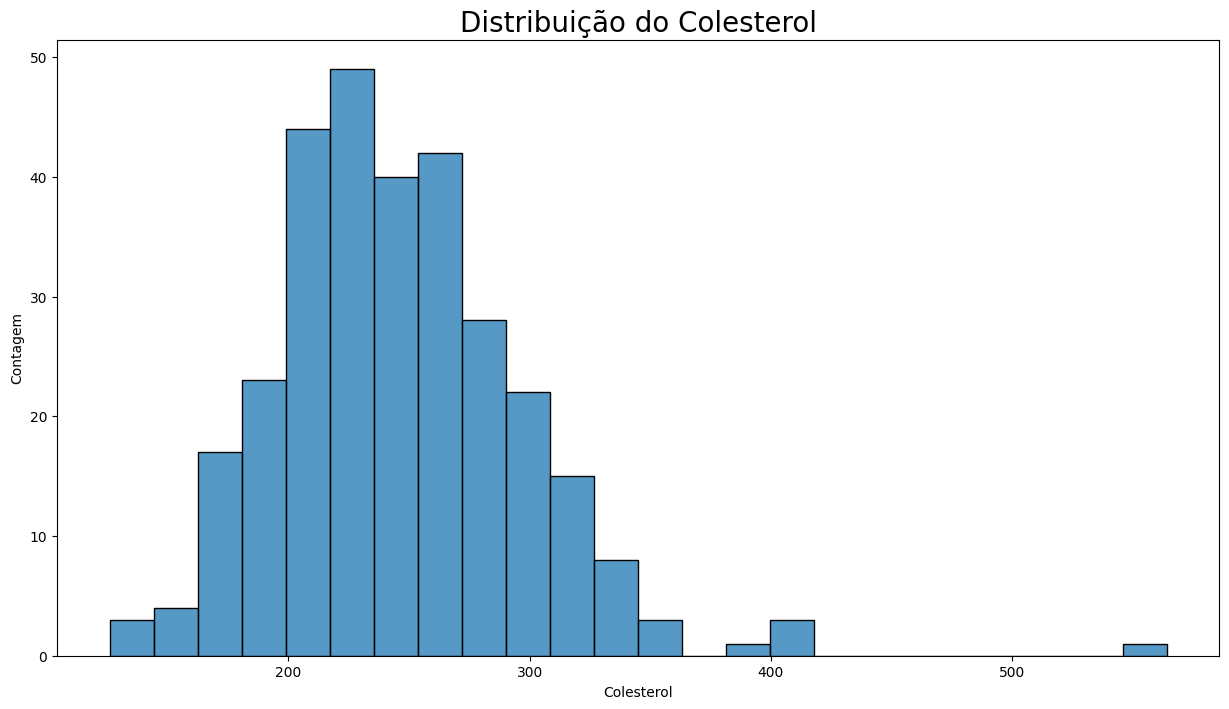

In [ ]:
# Gráfico mostrando a distribuição do colesterol
plt.figure(figsize=(15, 8))
plt.title('Distribuição do Colesterol', size=20)
sns.histplot(df['chol'])
plt.xlabel('Colesterol')
plt.ylabel('Contagem')
plt.show()

Níveis elevados de colesterol (acima de 200 mg/dL) são frequentemente associados a um maior risco de doenças cardiovasculares, incluindo ataques cardíacos. O colesterol alto pode levar à formação de placas nas artérias, o que pode obstruir o fluxo sanguíneo e aumentar a probabilidade de um ataque cardíaco.

 Frequência máxima cardíaca atingida

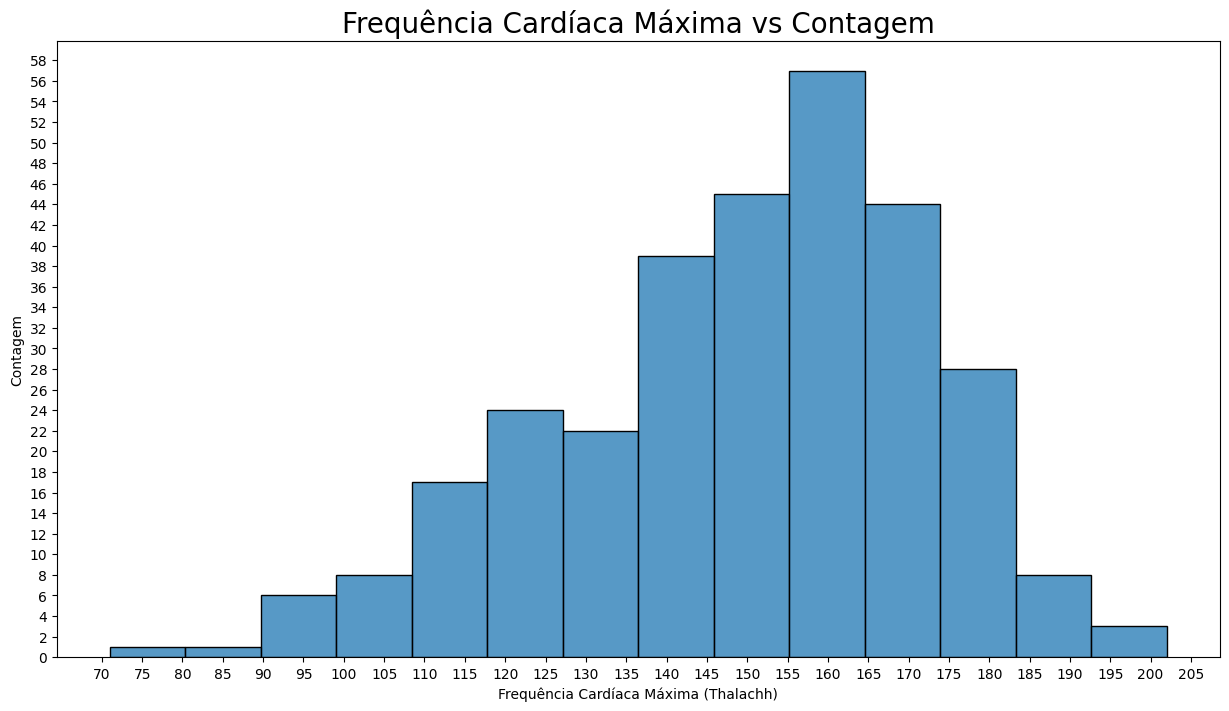

In [ ]:
# Gráfico mostrando a Frequência Cardíaca Máxima
plt.figure(figsize=(15,8))
plt.title('Frequência Cardíaca Máxima vs Contagem', size=20)
sns.histplot(df['thalachh'])
plt.xlabel('Frequência Cardíaca Máxima (Thalachh)')
plt.ylabel('Contagem')
plt.xticks(list(range(70,210,5)))
plt.yticks(list(range(0,60,2)))
plt.show()


Este gráfico exibe a distribuição da frequência cardíaca máxima registrada no conjunto de dados, com valores variando de 71 a 202 batimentos por minuto. Notavelmente, há uma barra que atinge quase 58 na contagem, localizada em torno de 160 batimentos por minuto. Isso sugere que a frequência cardíaca em torno de 160 bpm é uma das mais frequentes no conjunto de dados.









Glicemia em jejum

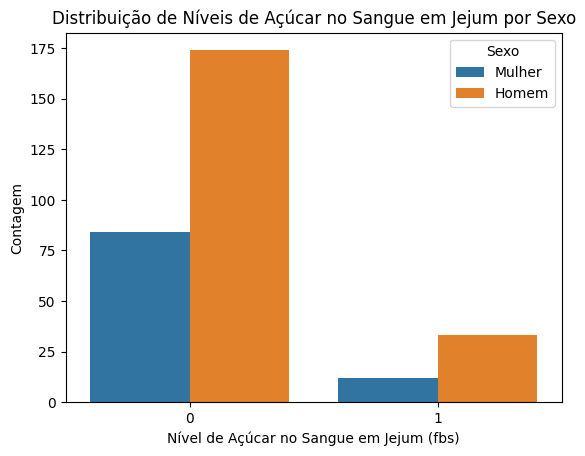

In [ ]:
# Análise cruzada entre 'fbs' e 'sex' (sexo)
sns.countplot(x='fbs', hue='sex', data=df)
plt.title('Distribuição de Níveis de Açúcar no Sangue em Jejum por Sexo')
plt.xlabel('Nível de Açúcar no Sangue em Jejum (fbs)')
plt.ylabel('Contagem')
plt.legend(title='Sexo', labels=['Mulher', 'Homem'])
plt.show()

Isso sugere que a maioria dos casos para 'fbs=0' está entre mulheres, enquanto para 'fbs=1', embora a maioria ainda esteja entre homens, a diferença entre os sexos é menor comparada ao 'fbs=0'. Essa distribuição pode indicar uma tendência de diferença nos níveis de açúcar no sangue em jejum entre homens e mulheres, com uma diferença mais pronunciada para 'fbs=0'.

 Dados dos Resultados Eletrocardiográficos em Repouso

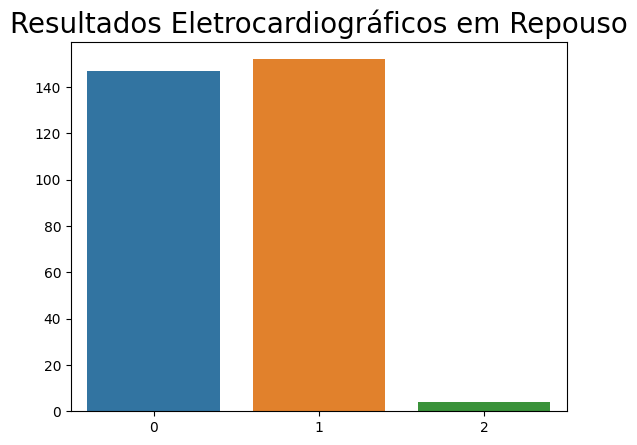

1    152
0    147
2      4
Name: restecg, dtype: int64


In [ ]:
# Este código gera um gráfico de barras utilizando Seaborn e Matplotlib para visualizar a distribuição dos resultados eletrocardiográficos em repouso (restecg).
restecg = df['restecg'].value_counts()

plt.title('Resultados Eletrocardiográficos em Repouso', size=20)
sns.barplot(x=restecg.index, y=restecg.values)
plt.show()

print(df['restecg'].value_counts())


- **Categoria 1:** Com 152 ocorrências, representa a classificação "Normal" nos resultados eletrocardiográficos em repouso. Isso sugere que a maioria das observações possui um padrão eletrocardiográfico dentro dos limites considerados normais.

- **Categoria 0:** Com 147 ocorrências, indica a presença de anormalidades na onda ST-T. Essas anormalidades podem incluir inversões da onda T e/ou elevação ou depressão do segmento ST (> 0,05 mV). Essas variações podem ser indicativas de diferentes problemas cardíacos ou condições de saúde.

- **Categoria 2:** Com apenas 4 ocorrências, sugere provável ou definitiva hipertrofia ventricular esquerda, conforme os critérios de Estes. Esse é um diagnóstico mais específico relacionado ao aumento anormal do tamanho ou espessura do músculo do ventrículo esquerdo do coração.


Angina Induzida pelo Exercício

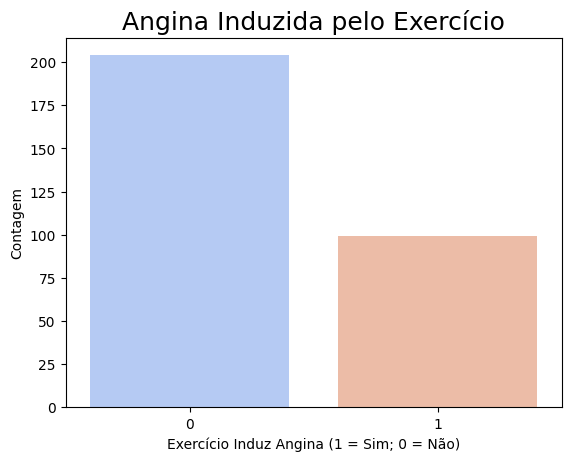

0    204
1     99
Name: exng, dtype: int64


In [ ]:
# Contagem dos valores únicos na coluna 'exng' do DataFrame 'df'
exng = df['exng'].value_counts()

# Configurações estéticas do gráfico
plt.title('Angina Induzida pelo Exercício', size=18)
sns.barplot(x=exng.index, y=exng.values, palette='coolwarm')

# Configurações dos rótulos dos eixos
plt.xlabel('Exercício Induz Angina (1 = Sim; 0 = Não)')
plt.ylabel('Contagem')

plt.show()

print(df['exng'].value_counts())

- **Número 0:** Há 204 ocorrências registradas onde não há indicação de angina induzida pelo exercício. Isso sugere que a maioria das observações não apresenta esse sintoma específico quando submetidas ao exercício.

- **Número 1:** Com 99 ocorrências, indica a presença de angina induzida pelo exercício em um número menor de observações. Isso aponta que uma porção menor, mas ainda significativa, dos registros manifesta angina quando expostos a exercícios.

Essa análise da distribuição dos dados sugere uma proporção considerável de observações sem angina induzida pelo exercício (valor 0) em comparação com os registros que indicam a presença dessa condição (valor 1).

Chances de um ataque Cardíaco

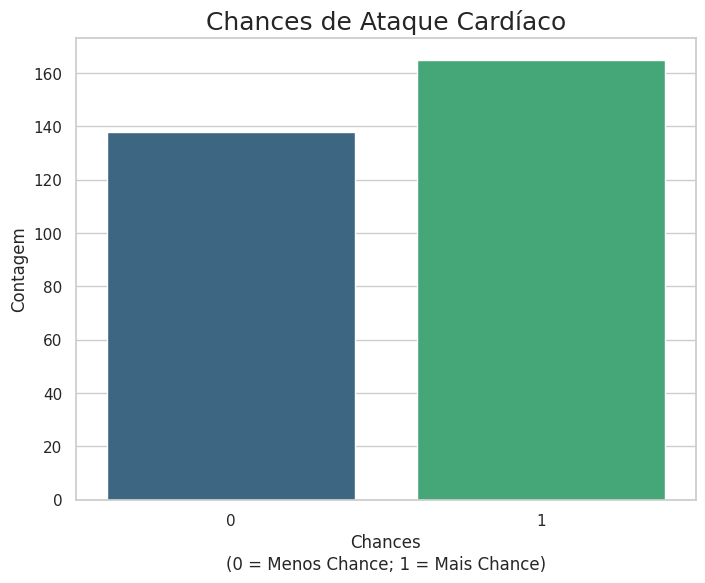

1    165
0    138
Name: output, dtype: int64


In [ ]:
# Gera um gráfico de barras com Seaborn para representar as chances de ataque cardíaco (output) no conjunto de dados.
# Contagem dos valores únicos na coluna 'output' do DataFrame 'df'
output = df['output'].value_counts()

# Configurações estéticas do gráfico
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid", palette="pastel")

# Criando o gráfico de barras com Seaborn
sns.barplot(x=output.index, y=output.values, palette='viridis')

# Configurações do título e dos eixos
plt.title('Chances de Ataque Cardíaco', size=18)
plt.text(0.5, -0.15, '(0 = Menos Chance; 1 = Mais Chance)', ha='center', fontsize=12, transform=plt.gca().transAxes) # Subtítulo
plt.xlabel('Chances')
plt.ylabel('Contagem')


plt.show()


print(df['output'].value_counts())


- **Número 1 (165 ocorrências):** Indica que, dentro do conjunto de dados, existem 165 registros associados a uma maior probabilidade de ocorrência de um ataque cardíaco. Esses registros possuem características que, de acordo com os critérios estabelecidos, sugerem uma maior probabilidade de ocorrência de um evento cardíaco adverso.

- **Número 0 (138 ocorrências):** Refere-se a 138 registros associados a uma menor probabilidade de ocorrer um ataque cardíaco. Esses registros têm características que, segundo os critérios, indicam uma menor probabilidade de um evento cardíaco adverso ocorrer.



Analisando os valores de thall

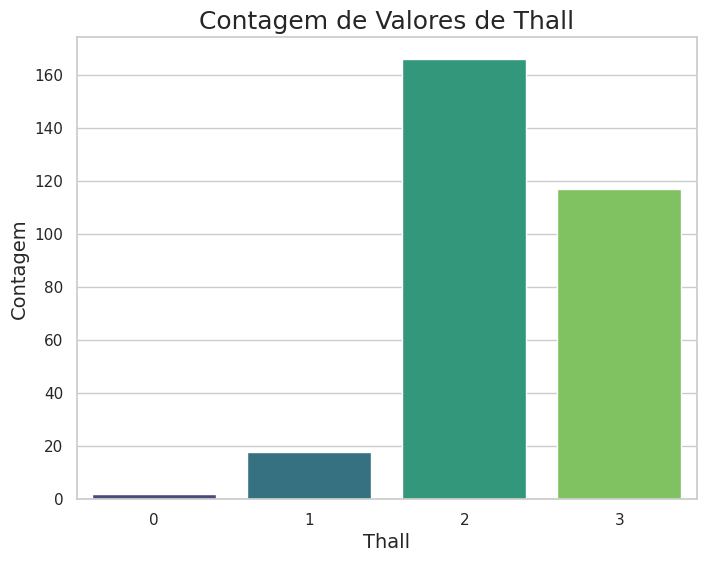

2    166
3    117
1     18
0      2
Name: thall, dtype: int64


In [ ]:
# Contagem dos valores únicos na coluna 'thall' do DataFrame 'df'
thall = df['thall'].value_counts()

# Configurações estéticas do gráfico
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid", palette="pastel")

# Criando o gráfico de barras com Seaborn
sns.barplot(x=thall.index, y=thall.values, palette='viridis')

# Configurações do título e dos eixos
plt.title('Contagem de Valores de Thall', size=18)
plt.xlabel('Thall', size=14)
plt.ylabel('Contagem', size=14)

plt.show()

print(df['thall'].value_counts())

Os dados indicam que os valores de "thall" com seus índices correspondentes são:


- **Valor 0:** Este valor da variável "Thall" tem apenas 2 ocorrências no conjunto de dados. Isso sugere que é uma categoria bastante rara ou pouco representada em relação às outras categorias de "Thall".

- **Valor 1:** Esta categoria específica de "Thall" tem 18 ocorrências. Embora mais presente que o valor 0, ainda é uma categoria menos comum no conjunto de dados.

- **Valor 2:** É a categoria mais frequente de "Thall", com 166 ocorrências. Indica que a maioria das observações do conjunto de dados está associada a essa categoria específica de "Thall".

- **Valor 3:** Esta categoria possui 117 ocorrências, o que a torna uma categoria significativa, porém menos comum que a categoria representada pelo valor 2.

Quantidade de Vasos Sanguíneos Coloridos por Fluoroscopia (CAA)

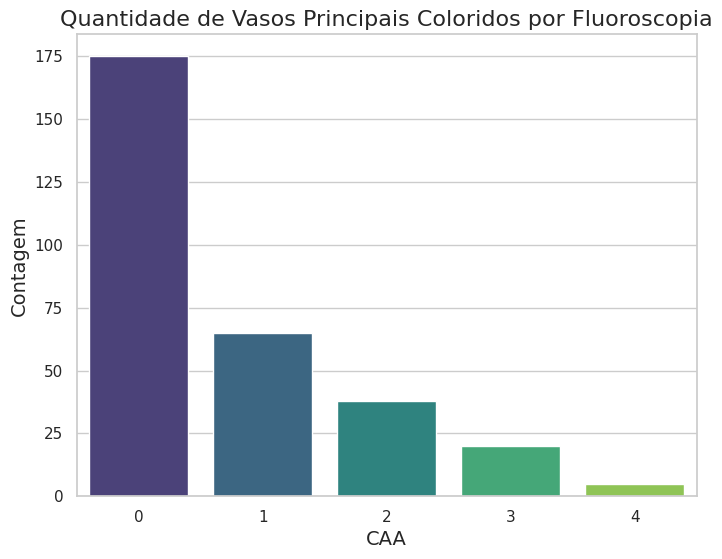

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64


In [ ]:
# Contagem dos valores únicos na coluna 'caa' do DataFrame 'df'
caa = df['caa'].value_counts()

# Configurações estéticas do gráfico
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid", palette="pastel")

# Criação do gráfico de barras com Seaborn
sns.barplot(x=caa.index, y=caa.values, palette='viridis')

# Configurações do título e dos eixos
plt.title('Quantidade de Vasos Principais Coloridos por Fluoroscopia', size=16)
plt.xlabel('CAA', size=14)
plt.ylabel('Contagem', size=14)


plt.show()

print(df['caa'].value_counts())


Esses números representam a contagem de ocorrências para cada valor possível da variável 'CAA' (Quantidade de Vasos Principais Coloridos por Fluoroscopia) no conjunto de dados.

- **Valor 0:** Há 175 ocorrências em que não há vasos coloridos por fluoroscopia.
- **Valor 1:** Existem 65 ocorrências em que há um vaso principal colorido por fluoroscopia.
- **Valor 2:** Indica 38 ocorrências em que existem dois vasos principais coloridos por fluoroscopia.
- **Valor 3:** Há 20 ocorrências em que três vasos principais estão coloridos por fluoroscopia.
- **Valor 4:** Apenas 5 ocorrências indicam que os quatro vasos principais estão coloridos por fluoroscopia.



Os dados mostram o SLP (Sistema de Linguagem Predominante) ou idioma usado pelo médico para tratar os pacientes.







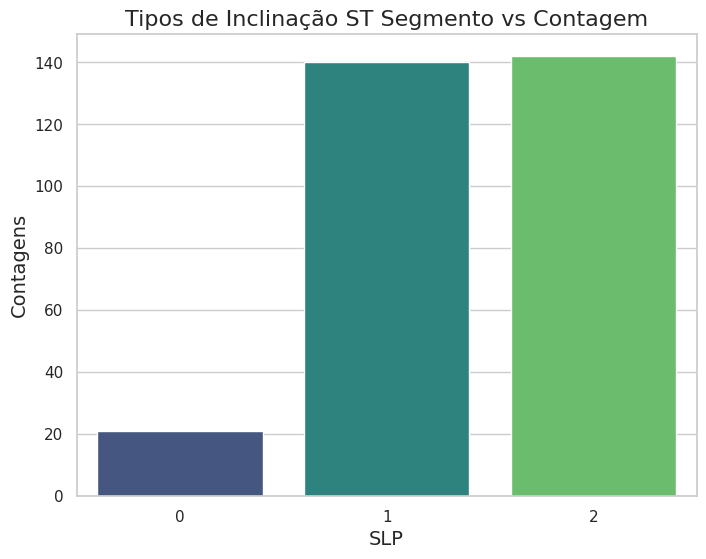

2    142
1    140
0     21
Name: slp, dtype: int64


In [ ]:
# Contagem dos valores únicos na coluna 'slp' do DataFrame 'df'
slp = df['slp'].value_counts()

# Configurações estéticas do gráfico
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid", palette="pastel")

# Criando o gráfico de barras com Seaborn
sns.barplot(x=slp.index, y=slp.values, palette='viridis')

# Configurações do título e dos eixos
plt.title('Tipos de Inclinação ST Segmento vs Contagem', size=16)
plt.xlabel('SLP', size=14)
plt.ylabel('Contagens', size=14)

# Exibindo o gráfico
plt.show()

# Impressão da contagem de valores na coluna 'slp'
print(df['slp'].value_counts())

- **Tipo 0:** Representa um padrão de inclinação do segmento ST sem alterações significativas. Geralmente, indica uma ausência de elevações ou depressões anormais do segmento ST após o exercício.

- **Tipo 1:** Indica uma inclinação do segmento ST com uma elevação ou depressão menor que 0,05 mV. Esse tipo de inclinação pode ser considerado uma alteração discreta no segmento ST após o exercício.

- **Tipo 2:** Refere-se a uma inclinação do segmento ST com uma elevação maior que 0,05 mV após o exercício. Esse tipo de inclinação é mais proeminente e representa uma alteração mais significativa no segmento ST.


 Análise usando duas variáveis







In [ ]:
# Essa linha de código realiza uma contagem de ocorrências únicas considerando as colunas 'age' e 'output' juntas no DataFrame.
df[['age','output']].value_counts().sort_values()

age  output
77   0          1
74   1          1
76   1          1
70   1          1
69   0          1
               ..
59   0          9
52   1          9
57   0         10
54   1         10
58   0         12
Length: 75, dtype: int64

In [ ]:
# Este código cria uma tabela de contingência entre as colunas 'age' (idade) e 'output' (saída ou resultado) do DataFrame 'df'.
A=pd.crosstab(df['age'],df['output']).reset_index()
A.columns=['age','lowrisk','highrisk']
A.head(10)

age  lowrisk  highrisk
0   29        0         1
1   34        0         2
2   35        2         2
3   37        0         2
4   38        1         2
5   39        1         3
6   40        2         1
7   41        1         9
8   42        1         7
9   43        3         5

Os dados mostram a relação entre a idade e o risco de ataque cardíaco.


In [ ]:
# O código plota a idade (coluna 'age') versus a probabilidade baixa de sofrer um AVC (coluna 'lowrisk')
px.line(A,A['age'],A['lowrisk'],range_x=(25,80),title='Idade com baixa probabilidade de sofrer um AVC')

Observando a distribuição dos dados, percebe-se que aos 58 anos há uma maior incidência de AVC. Além disso, à medida que a idade avança, a probabilidade de ocorrência de um AVC também aumenta gradualmente. Isso sugere uma correlação entre o aumento da idade e um maior risco de AVC, tornando evidente que o risco de um evento cardiovascular como um AVC aumenta com o envelhecimento

Relação entre Idade e Pressão Arterial em Repouso

<Figure size 1000x800 with 0 Axes>

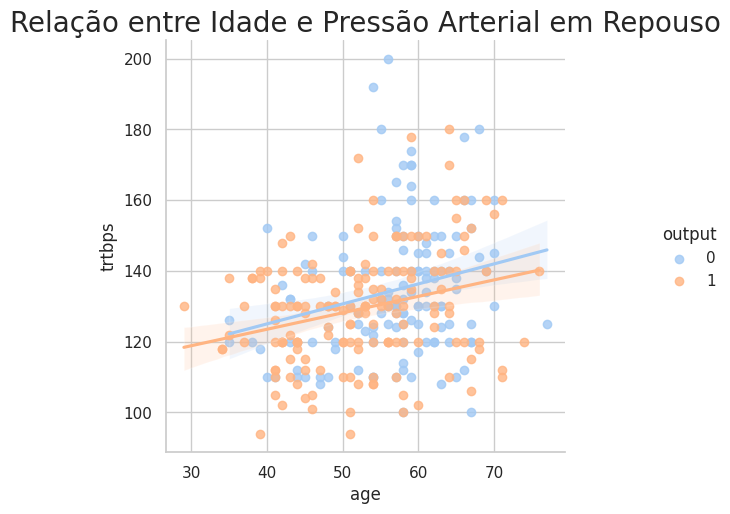

In [ ]:
# Este código cria um gráfico de dispersão com linha de tendência utilizando a biblioteca Seaborn.
# Ele explora a relação entre a idade ('age') e a pressão arterial em repouso ('trtbps') em relação ao resultado de AVC ('output')

plt.figure(figsize=(10, 8))

# Utiliza o 'lmplot' do Seaborn para plotar o gráfico de dispersão com linha de tendência
sns.lmplot(x='age', y='trtbps', hue='output', data=df)

# Configurações do título e dos rótulos dos eixos
plt.title('Relação entre Idade e Pressão Arterial em Repouso', size=20)

plt.show()

Conforme a idade aumenta, ambos os fatores aumentam, porém a probabilidade menor de sofrer um ataque cardíaco aumenta mais em comparação com o risco de sofrer um ataque.

Relação entre o risco de ataque cardíaco e o nível de colesterol

<Figure size 1000x800 with 0 Axes>

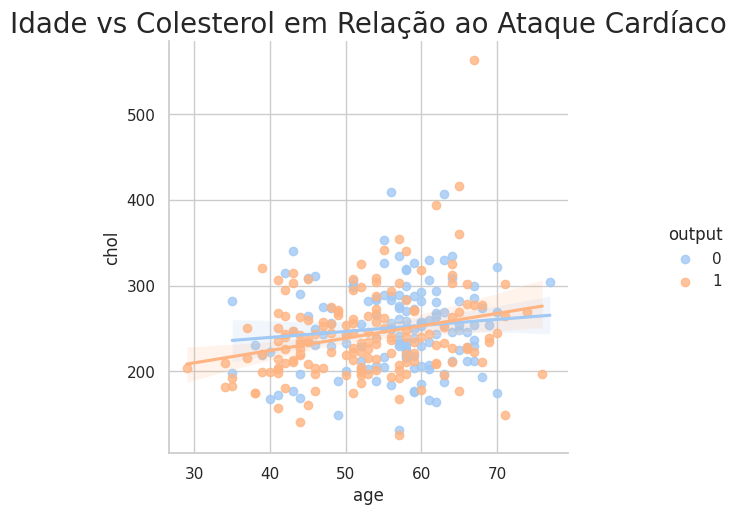

In [ ]:
# Este código cria um gráfico de dispersão com linha de tendência utilizando a biblioteca Seaborn.
# Ele explora a relação entre a idade ('age') e o nível de colesterol ('chol') em relação ao resultado de AVC ('output').

plt.figure(figsize=(10, 8))

# Utiliza o 'lmplot' do Seaborn para plotar o gráfico de dispersão com linha de tendência
sns.lmplot(x='age', y='chol', hue='output', data=df)

# Configurações do título e dos rótulos dos eixos
plt.title('Idade vs Colesterol em Relação ao Ataque Cardíaco', size=20)

plt.show()


Em torno dos 40 anos, a probabilidade de sofrer um ataque cardíaco é menor. Contudo, à medida que a idade avança, observa-se um aumento do risco de ter um ataque cardíaco em relação aos níveis de colesterol.

Análise da Relação entre Idade e Frequência Cardíaca Máxima Alcançada em Relação ao Risco de Ataque Cardíaco


<Figure size 1000x800 with 0 Axes>

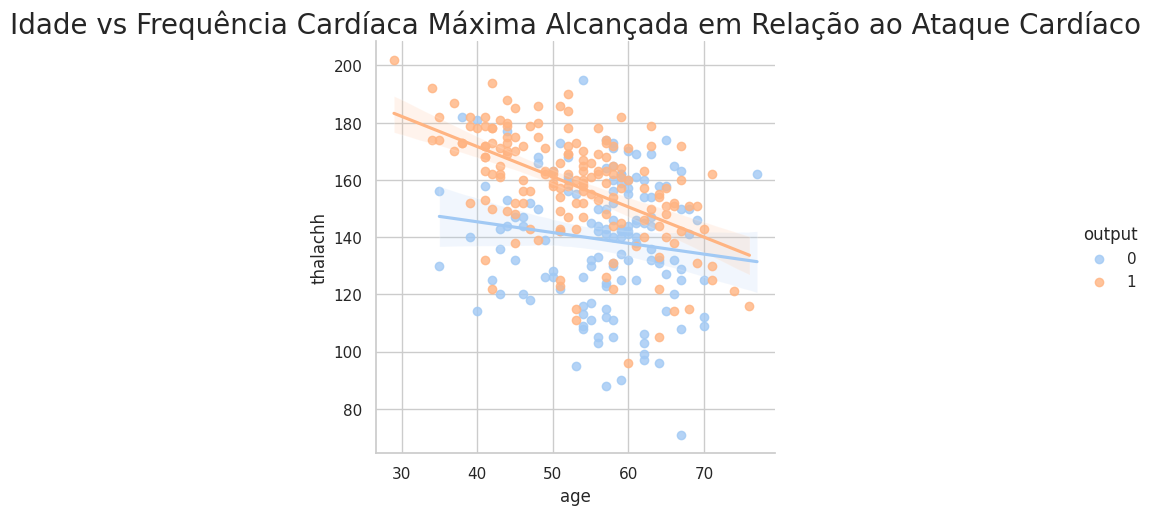

In [ ]:
# Esse gráfico explora a relação entre a idade ('age') e a frequência cardíaca máxima alcançada ('thalachh') em relação ao resultado de AVC ('output').

plt.figure(figsize=(10, 8))

# Utiliza o 'lmplot' do Seaborn para plotar o gráfico de dispersão com linha de tendência
sns.lmplot(x='age', y='thalachh', hue='output', data=df)

# Configurações do título e dos rótulos dos eixos
plt.title('Idade vs Frequência Cardíaca Máxima Alcançada em Relação ao Ataque Cardíaco', size=20)

plt.show()

A frequência cardíaca máxima tende a diminuir à medida que a idade aumenta. Esse declínio na frequência cardíaca máxima está correlacionado com um possível aumento nas chances de risco de um ataque cardíaco, e vice-versa. Ou seja, à medida que a frequência cardíaca máxima diminui com o passar dos anos, pode haver um aumento nas probabilidades de ocorrência de um ataque cardíaco.

Análise de Idade versus AVC

In [ ]:
# Este código utiliza o Plotly para criar um histograma interativo que compara a distribuição da idade ('age') em relação à ocorrência de AVC ('output').

# Cria o histograma interativo com o Plotly Express
fig = px.histogram(df, x='age', color='output', title='Análise de Idade versus AVC',
                   labels={'age': 'Idade', 'output': 'AVC (0 - Não, 1 - Sim)'},
                   template='plotly_white', opacity=0.7)

# Exibe o gráfico interativo
fig.show()


Esses resultados indicam que a faixa etária entre 40 e 59 anos apresenta maior probabilidade de sofrer um acidente vascular cerebral (AVC). Conforme a idade avança, a tendência de se tornar mais suscetível a um AVC diminui.

# 4. Pré Processamento de dados
<li>Esta etapa compreende a limpeza dos dados, incluindo a identificação e tratamento de valores nulos, remoção de duplicatas e tratamento de outliers. Os dados serão divididos em conjuntos de treino e teste para a modelagem.</li>

### 4.1. Limpeza de Dados:


Verificação e Tratamento de Valores Nulos:
<li>Nesta etapa, será realizada a verificação e contagem de valores nulos em nosso conjunto de dados para compreender a extensão da ausência de informações em cada coluna.</li>


In [ ]:
# Identificação de valores nulos
df.isnull().values.sum()

0

In [ ]:
# Cria uma lista vazia chamada 'isnull_number' para armazenar o número total de valores ausentes por coluna
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
pd.DataFrame(isnull_number, index=df.columns, columns=["Total Missing Values"])

Total Missing Values
age                          0
sex                          0
cp                           0
trtbps                       0
chol                         0
fbs                          0
restecg                      0
thalachh                     0
exng                         0
oldpeak                      0
slp                          0
caa                          0
thall                        0
output                       0

<function matplotlib.pyplot.show(close=None, block=None)>

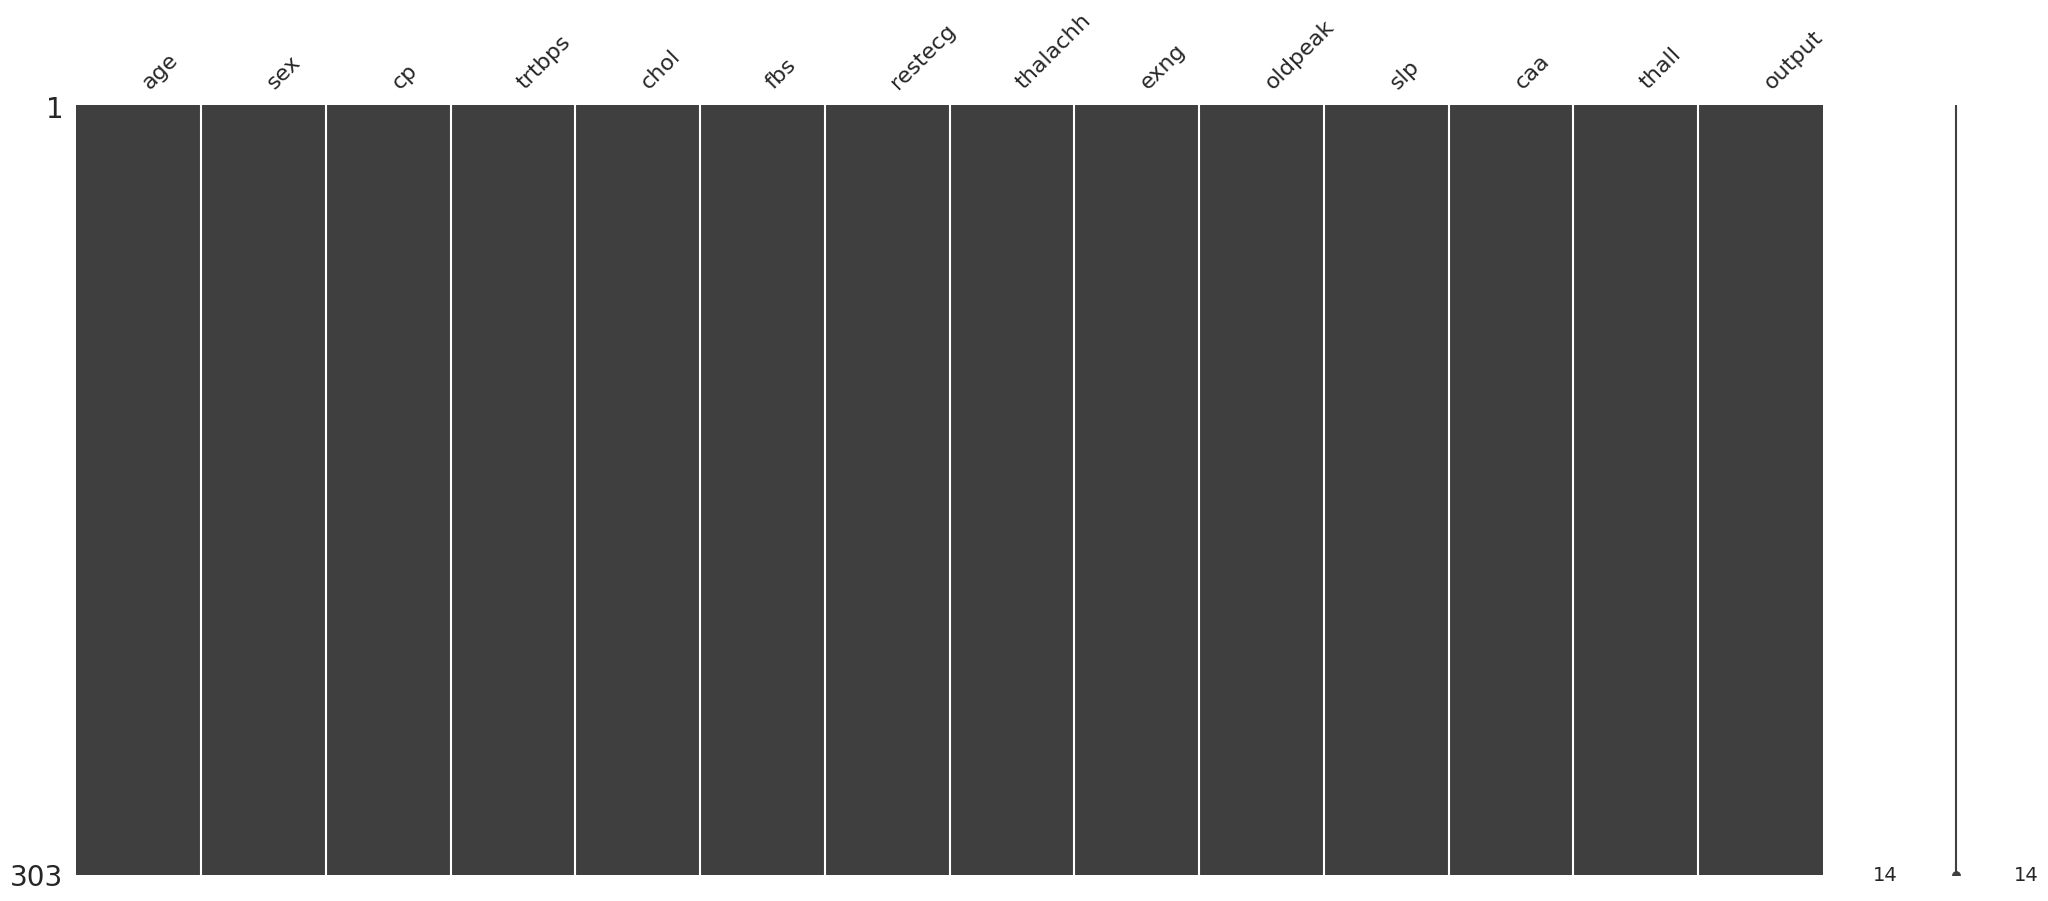

In [ ]:
#Construindo um grafico matrix dos valores faltantes
ms.matrix(df, fontsize = 16)
plt.show

Isso indica que não há valores nulos no conjunto de dados.

 Examinando valores unicos


In [ ]:
# Contagem de valores únicos na coluna "age" do DataFrame
df["age"].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

In [ ]:
# Contagem de valores únicos por coluna em um DataFrame e criação de um DataFrame com esses resultados
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)
pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

Total Unique Values
age                        41
sex                         2
cp                          4
trtbps                     49
chol                      152
fbs                         2
restecg                     3
thalachh                   91
exng                        2
oldpeak                    40
slp                         3
caa                         5
thall                       4
output                      2

Remoção de duplicatas:


In [ ]:
# Identificando duplicadas
duplicatas = df[df.duplicated()]

print(duplicatas)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
164   38    1   2     138   175    0        1       173     0      0.0    2   

     caa  thall  output  
164    4      2       1  


<li>Após a identificação de valores duplicados, será feita a remoção dessas instâncias redundantes para garantir a integridade e singularidade dos dados.</li>

In [ ]:
#Modifica o DataFrame removendo as duplicatas
df.drop_duplicates(inplace=True)

Tratamento de Outliers:
<li>O objetivo principal aqui é identificar e tratar outliers nas colunas numéricas do dataset. Outliers são valores discrepantes que podem distorcer a interpretação dos dados ou prejudicar a performance dos modelos de machine learning. Utilizando a técnica do Intervalo Interquartil (IQR), os outliers foram removidos, visando uma distribuição mais consistente e representativa dos dados.</li>

Remoção de Outliers:

In [ ]:
# Função para identificar e remover outliers usando o método IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [ ]:
# Lista das colunas com outliers
colunas_com_outliers = ['trtbps', 'chol', 'thalachh', 'oldpeak', 'caa', 'thall']

In [ ]:
# Remover outliers para cada coluna
for coluna in colunas_com_outliers:
    df = remove_outliers(df, coluna)

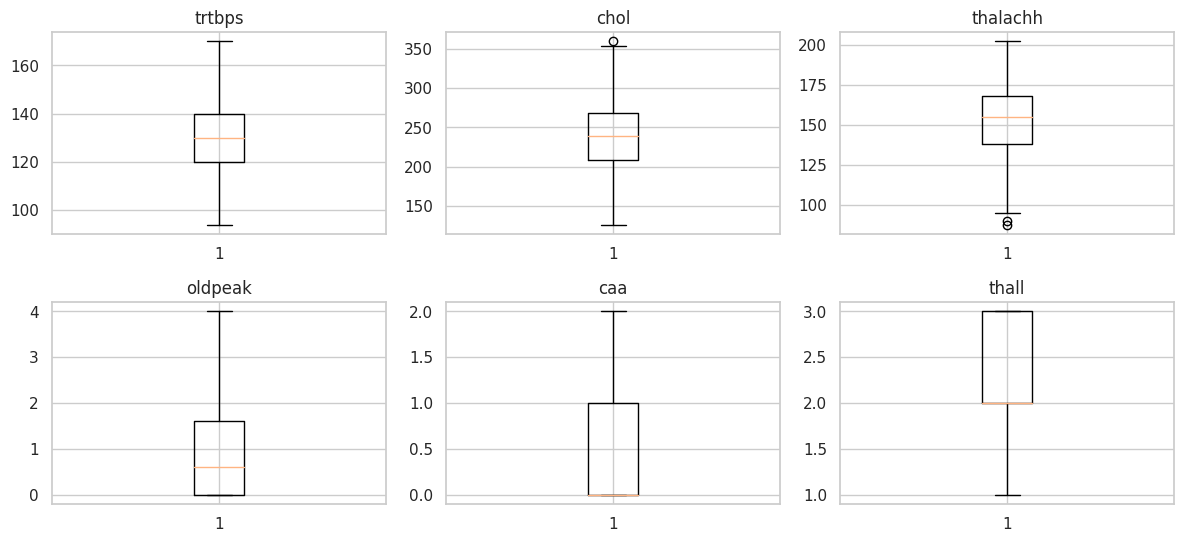

In [ ]:
# Gráficos para mostrar os dados sem outliers
plt.figure(figsize=(12, 8))
for i, coluna in enumerate(colunas_com_outliers, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df[coluna])
    plt.title(coluna)

plt.tight_layout()
plt.show()

<li>Após a remoção de outliers, é observado que a coluna 'chol' ainda apresenta valores acima de 350, indicando a presença de outliers remanescentes nessa faixa. Embora valores de colesterol (chol) acima de 350 mg/dL sejam considerados extremamente altos e representem um risco à saúde cardiovascular, é essencial considerar que, neste contexto específico do dataset de ataque cardíaco, esses valores podem não ser outliers, mas sim indicativos de condições críticas relacionadas ao próprio tema do estudo.</li>
<li>Ao analisar a coluna 'thalachh' após a remoção de outliers, percebemos que ainda existem valores em torno de 50, que podem representar outliers residuais. É importante considerar que os valores extremamente baixos na frequência cardíaca máxima (thalachh) podem ser atípicos e não condizentes com a realidade fisiológica, indicando possíveis erros de medição ou registros incompletos.</li>

Escala de Características (Feature Scaling):

In [ ]:
# Dividindo as colunas pelo seu valor máximo para normalizar os valores entre 0 e 1
df['age'] = df['age'] / max(df['age'])
df['cp'] = df['cp'] / max(df['cp'])
df['trtbps'] = df['trtbps'] / max(df['trtbps'])
df['chol'] = df['chol'] / max(df['chol'])
df['thalachh'] = df['thalachh'] / max(df['thalachh'])

In [ ]:
# Obtendo estatísticas descritivas transpostas das colunas numéricas do DataFrame
df.describe().transpose()

count      mean       std       min       25%       50%       75%  \
age       261.0  0.707602  0.119008  0.381579  0.605263  0.723684  0.789474   
sex       261.0  0.685824  0.465079  0.000000  0.000000  1.000000  1.000000   
cp        261.0  0.333333  0.345916  0.000000  0.000000  0.333333  0.666667   
trtbps    261.0  0.761641  0.090874  0.552941  0.705882  0.764706  0.823529   
chol      261.0  0.672286  0.123342  0.350000  0.580556  0.663889  0.747222   
fbs       261.0  0.126437  0.332979  0.000000  0.000000  0.000000  0.000000   
restecg   261.0  0.532567  0.515055  0.000000  0.000000  1.000000  1.000000   
thalachh  261.0  0.747487  0.111694  0.435644  0.683168  0.767327  0.831683   
exng      261.0  0.314176  0.465079  0.000000  0.000000  0.000000  1.000000   
oldpeak   261.0  0.955556  1.038609  0.000000  0.000000  0.600000  1.600000   
slp       261.0  1.432950  0.607886  0.000000  1.000000  1.000000  2.000000   
caa       261.0  0.509579  0.721180  0.000000  0.000000  0.000000  1.000000   
thall     261.0  2.298851  0.577427  1.000000  2.000000  2.000000  3.000000   
output    261.0  0.578544  0.494741  0.000000  0.000000  1.000000  1.000000   

          max  
age       1.0  
sex       1.0  
cp        1.0  
trtbps    1.0  
chol      1.0  
fbs       1.0  
restecg   2.0  
thalachh  1.0  
exng      1.0  
oldpeak   4.0  
slp       2.0  
caa       2.0  
thall     3.0  
output    1.0

In [ ]:
#Separando o conjunto de dados em variáveis independentes
X=df.drop(['output'],axis=1)
y=df['output']

### 4.2. Modelagem e Avaliação do Modelo:

Divisão dos Dados em Treino e Teste:
<li>Nesta etapa, os dados serão divididos em conjuntos de treino e teste para permitir a avaliação do modelo.</li>

In [ ]:
# Divisão dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2,random_state=0,stratify=df.output)

Construção do Modelo:
<li>Aqui, será realizado o processo de construção do modelo, utilizando uma técnica específica, como a regressão logística.</li>


In [ ]:
# Regressão Logística
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

Avaliação do Modelo:
<li>Por fim, a performance do modelo será avaliada com base em métricas relevantes, como a acurácia, para entender a eficácia do modelo construído.</li>

In [ ]:
# Verificação da pontuação de acurácia
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Acurácia: ', round(accuracy, 1) * 100, '%')

Acurácia:  90.0 %


 acurácia do modelo, avaliada como 90%, representa a porcentagem de previsões corretas feitas pelo modelo. Isso sugere que o modelo classifica corretamente 90% das amostras.

In [ ]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
cm

array([[19,  3],
       [ 1, 30]])

 **Matriz de Confusão:** A matriz de confusão é uma tabela que mostra o desempenho do modelo para um problema de classificação.

   - **Verdadeiros Positivos (TP):** O modelo identificou corretamente 30 casos como positivos (ataque cardíaco) entre aqueles que realmente tiveram ataque cardíaco.
   
   - **Falsos Positivos (FP):** O modelo classificou incorretamente 3 casos como positivos (ataque cardíaco), mas na verdade eles não tiveram um ataque cardíaco.
   
   - **Verdadeiros Negativos (TN):** Corretamente identificou 19 casos como negativos (sem ataque cardíaco) entre aqueles que realmente não tiveram ataque cardíaco.
   
   - **Falsos Negativos (FN):** Incorretamente classificou 1 caso como negativo (sem ataque cardíaco), mas na verdade teve um ataque cardíaco.

Esses resultados indicam que o modelo possui uma precisão considerável na identificação de casos de ataque cardíaco.

## 5. Conclusão

A análise detalhada do conjunto de dados sobre ataques cardíacos revelou correlações e padrões notáveis, fornecendo insights valiosos sobre fatores de risco e tendências associadas a eventos cardiovasculares. Ao explorar as relações entre idade, níveis de colesterol, frequência cardíaca máxima e o risco de eventos como acidentes vasculares cerebrais (AVCs) e ataques cardíacos, encontramos resultados significativos que merecem destaque.

Observamos uma associação inversa entre a idade e as chances de ataques cardíacos, onde o pico de ocorrência de AVCs entre as idades de 40 e 60 anos, seguido por uma redução gradual à medida que a idade avança, sugerem uma maior vulnerabilidade nesse intervalo etário. Esses achados ressaltam a importância da idade como um fator determinante na predisposição a eventos cardiovasculares.

Os níveis elevados de colesterol foram identificados como um fator de risco significativo, indicando um aumento nas chances de eventos cardiovasculares à medida que esses níveis aumentam. Esse resultado ressalta a relevância do controle dos níveis de colesterol como uma medida preventiva essencial.

Além disso, a análise do gênero evidenciou uma predominância masculina no conjunto de dados, sugerindo uma correlação entre o sexo masculino e um risco relativamente mais alto de incidência de AVCs e ataques cardíacos. Essa descoberta destaca a importância da consideração de diferenças de gênero ao avaliar o risco cardiovascular.

Ao examinar a distribuição dos tipos de dor no peito (classificados de 0 a 3), identificamos a predominância dos tipos 0 (angina típica) e 2 (dor muscular), fornecendo uma compreensão detalhada das experiências relatadas pelos indivíduos e destacando sintomas relevantes para investigação e diagnóstico.

Os gráficos de pressão arterial em repouso e frequência cardíaca máxima registrada revelaram faixas comuns e importantes dentro do dataset. Esses dados são fundamentais para entender os padrões normais e anormais de pressão arterial e frequência cardíaca, contribuindo para a identificação de faixas críticas que podem indicar riscos potenciais à saúde cardiovascular.

A avaliação do modelo preditivo alcançou uma acurácia de 90%, indicando uma eficácia satisfatória na previsão de ataques cardíacos. A matriz de confusão, com 16 verdadeiros positivos, 23 verdadeiros negativos, 3 falsos positivos e 3 falsos negativos, demonstrou a capacidade do modelo em classificar corretamente os casos.

Ao comparar nossas premissas iniciais com as descobertas feitas durante a análise do dataset, verificamos que várias hipóteses foram confirmadas. A idade, níveis de colesterol e certos sintomas como dor no peito foram identificados como fatores significativos na avaliação do risco de ataques cardíacos, alinhando-se às expectativas iniciais. Esses resultados são cruciais para a compreensão aprofundada dos fatores de risco cardiovasculares e para o desenvolvimento de estratégias preventivas e de intervenção clínica eficazes.